Model MEtrics

Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots\average_R2_AP.png


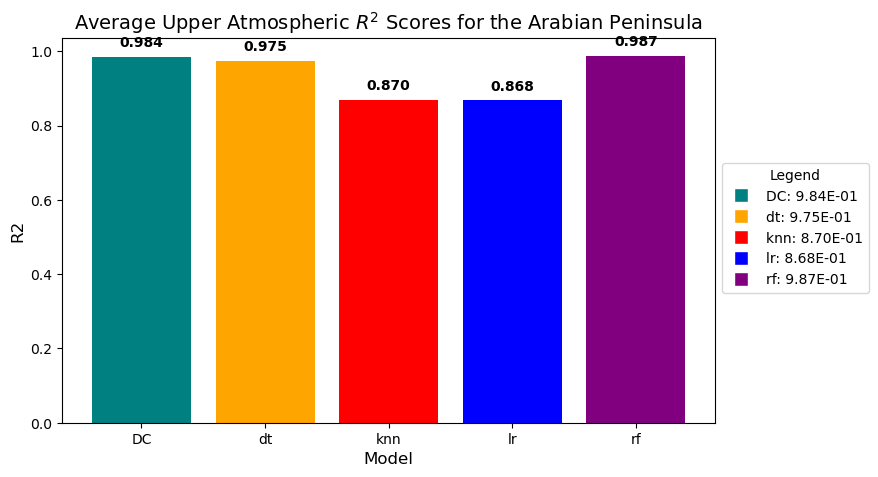

Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots\average_MSE_AP.png


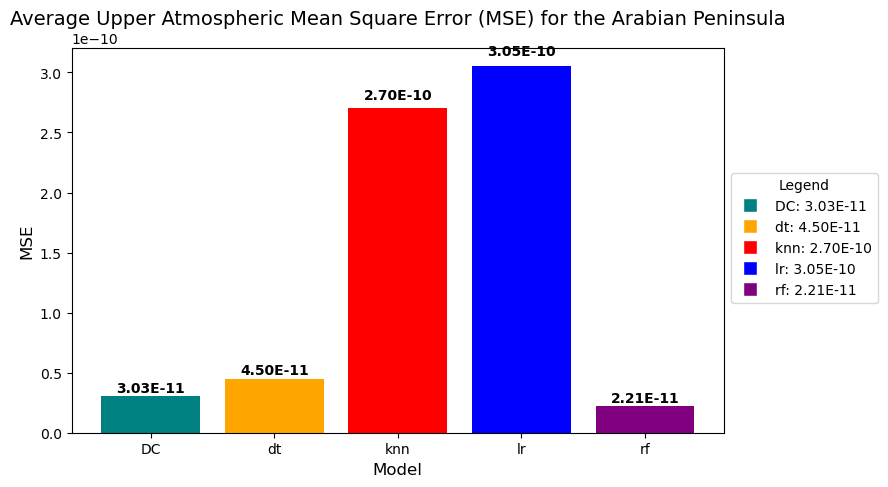

Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots\average_MAE_AP.png


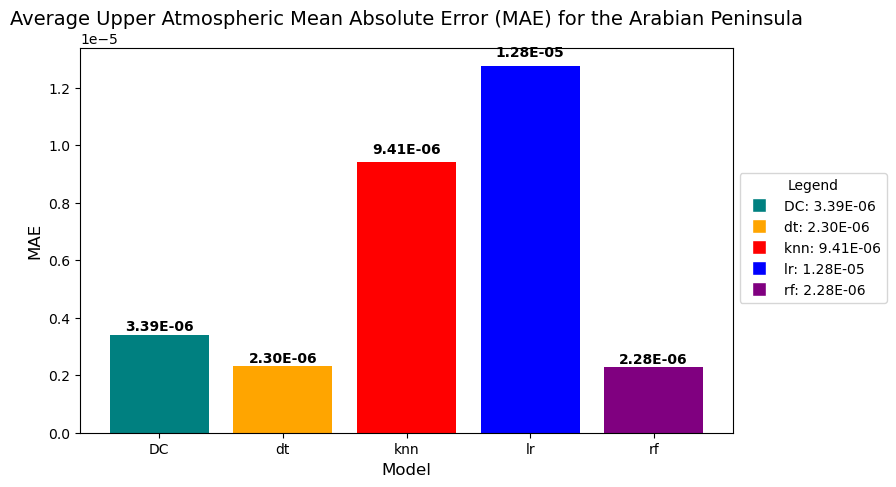

Saved regional average plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots\average_Weight_AP.png


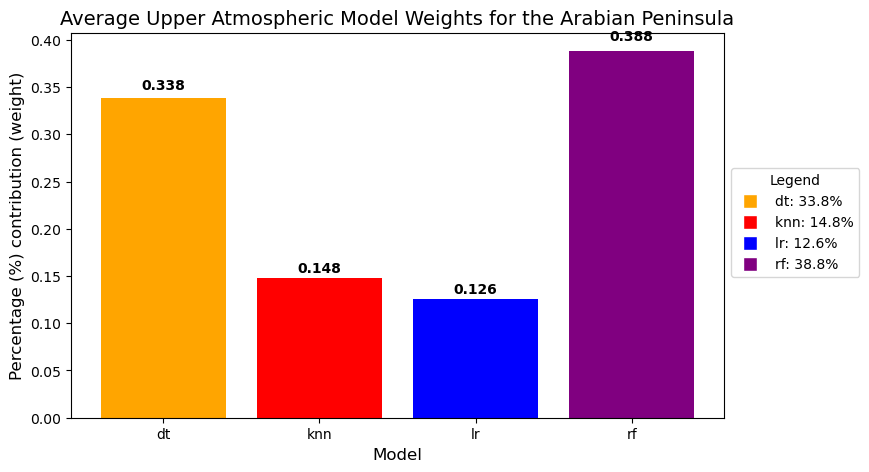

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\ua_model_metrics_2023_v0063.csv"
data = pd.read_csv(file_path)

# Rename ensemble model to 'DustCast' (DC)
data['Model'] = data['Model'].replace({'ensemble': 'DC'})

# Define color and marker scheme
model_styles = {
    'DC': ('teal', 's'),  # DustCast
    'lr': ('blue', 's'),  # Linear Regression
    #'svr': ('green', 's'),  # Support Vector Regression
    'knn': ('red', 's'),  # K-Nearest Neighbors
    'dt': ('orange', 's'),  # Decision Tree
    'rf': ('purple', 's')  # Random Forest
}

# Metrics to plot
metrics = ['Weight', 'R2', 'MSE', 'MAE']
titles = {
    'Weight': "Model Weights",
    'R2': "$R^2$ Scores",
    'MSE': "Mean Square Error (MSE)",
    'MAE': "Mean Absolute Error (MAE)"
}

# Define output directory for plots
output_dir = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_metric_plots"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

def add_value_labels(ax, bars, is_sci_notation=False):
    """Adds value labels on top of each bar."""
    for bar in bars:
        height = bar.get_height()
        if is_sci_notation:
            label = f"{height:.2E}"  # Scientific notation
        else:
            label = f"{height:.3f}"
        ax.text(bar.get_x() + bar.get_width() / 2, height * 1.02, label,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Compute and plot the average MSE, MAE, R², and Weight across all countries
for metric in ['R2', 'MSE', 'MAE', 'Weight']:
    average_metrics = data.groupby('Model')[metric].mean().reset_index()
    
    # For the Weight metric, exclude DC and update the y-axis label and legend formatting
    if metric == "Weight":
        average_metrics = average_metrics[average_metrics['Model'] != 'DC']
    
    # Create a new figure for the regional average with space for the right legend
    fig, ax = plt.subplots(figsize=(9, 5))
    colors = [model_styles.get(model, ('gray', 'o'))[0] for model in average_metrics['Model']]
    
    bars = ax.bar(average_metrics['Model'], average_metrics[metric], color=colors)
    ax.set_title(f"Average Upper Atmospheric {titles[metric]} for the Arabian Peninsula", fontsize=14)
    ax.set_xlabel("Model", fontsize=12)
    if metric == "Weight":
        ax.set_ylabel("Percentage (%) contribution (weight)", fontsize=12)
    else:
        ax.set_ylabel(metric, fontsize=12)

    # Apply scientific notation to y-axis for small values for MSE and MAE
    if metric in ['MSE', 'MAE']:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        add_value_labels(ax, bars, is_sci_notation=True)
    else:
        add_value_labels(ax, bars, is_sci_notation=False)

    # Separate Legends: Model Colors (inside) and Metric Values (right next to the graph)
    filtered_models = average_metrics['Model'].unique()

    # Legend 1: Model Colors (inside graph, upper right)
    handles_colors = [plt.Line2D([0], [0], marker=model_styles[m][1], color='w', 
                                 markerfacecolor=model_styles[m][0], markersize=10) 
                      for m in filtered_models if m in model_styles]

    # Legend 2: Metric Values (right next to the graph)
    if metric == "Weight":
        # Convert the weight value to percentage format
        labels_values = [f"{m}: {average_metrics[average_metrics['Model'] == m][metric].values[0]*100:.1f}%" 
                         for m in filtered_models if m in model_styles]
    else:
        labels_values = [f"{m}: {average_metrics[average_metrics['Model'] == m][metric].values[0]:.2E}"
                         for m in filtered_models if m in model_styles]
    
    fig.subplots_adjust(right=0.85)  # Fine-tune spacing for the second legend
    legend2 = plt.figlegend(handles_colors, labels_values, loc='center left', title="Legend", bbox_to_anchor=(0.85, 0.5))

    # Save the figure
    save_path = os.path.join(output_dir, f"average_{metric}_AP.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved regional average plot: {save_path}")

    # Show the plot
    plt.show()


Per-level aggregated metrics saved to Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\aggregated_model_metrics_per_level.csv
Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_1000.png


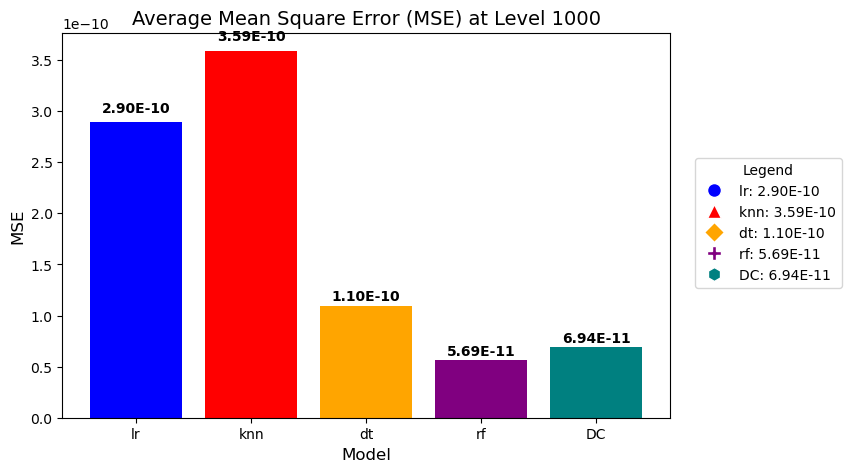

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_1000.png


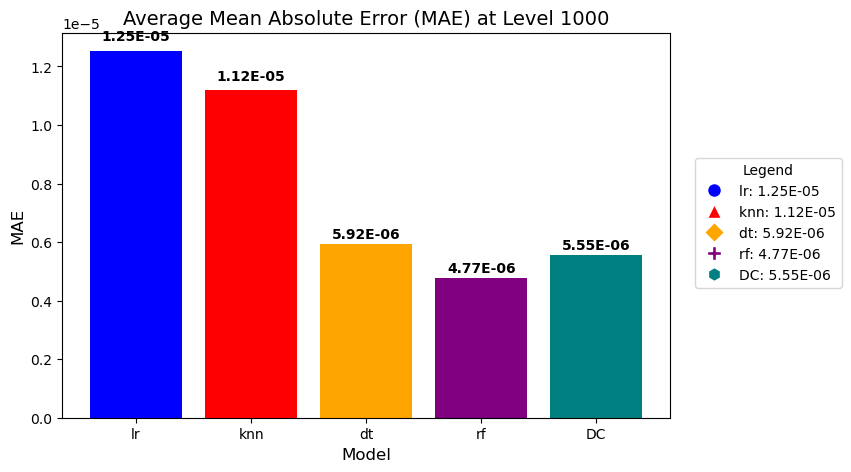

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_1000.png


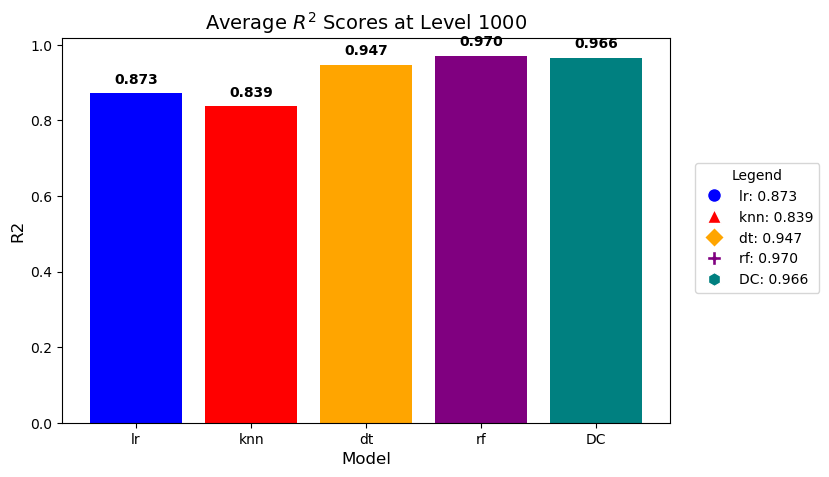

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_1000.png


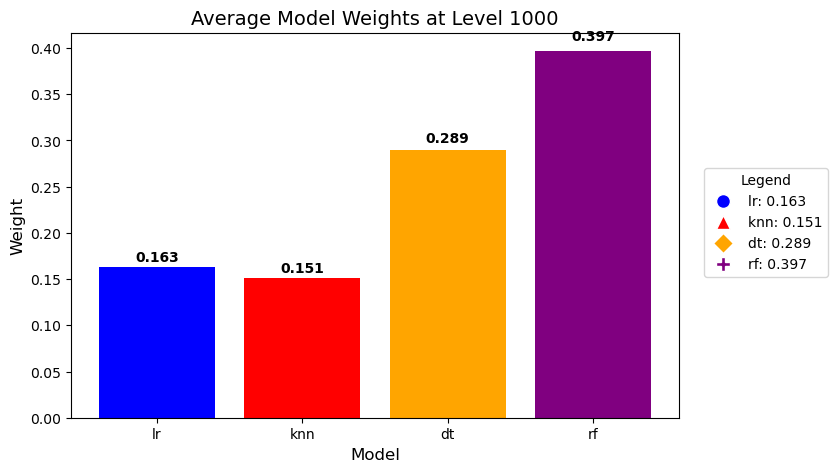

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_925.png


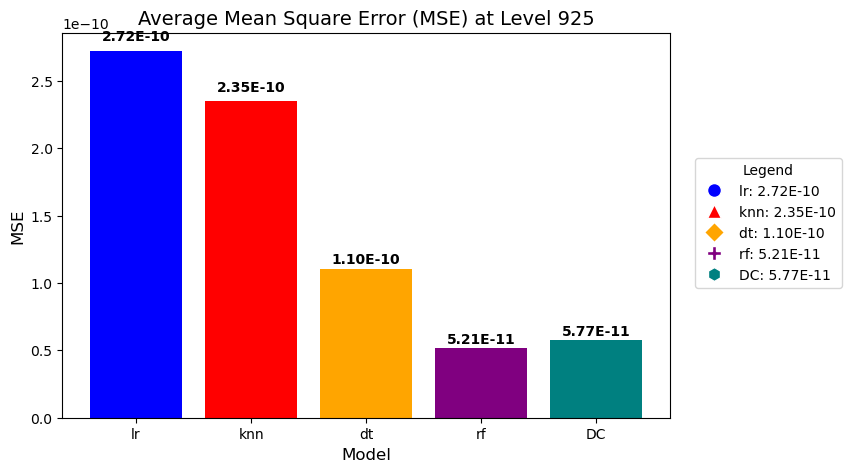

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_925.png


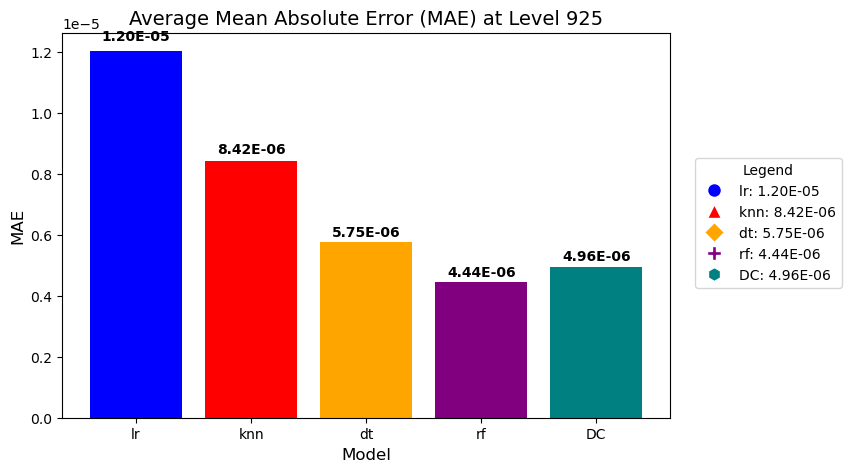

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_925.png


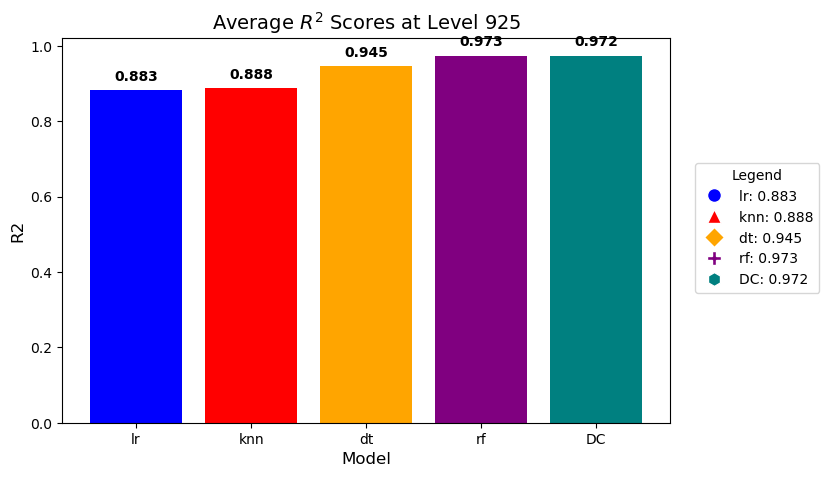

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_925.png


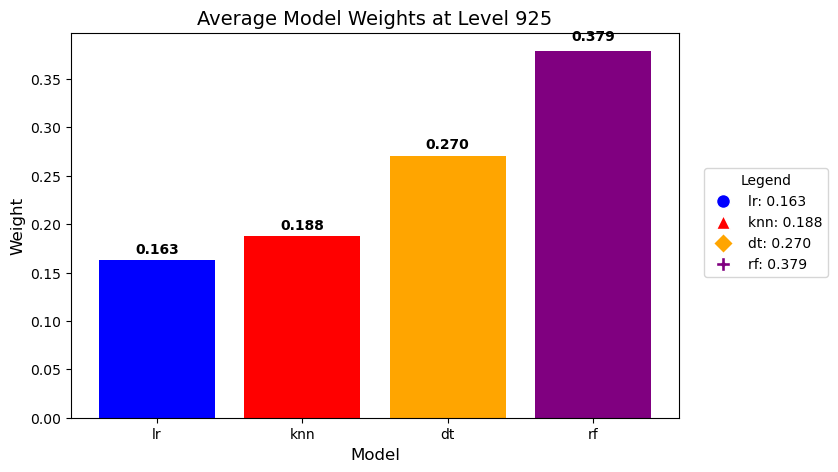

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_850.png


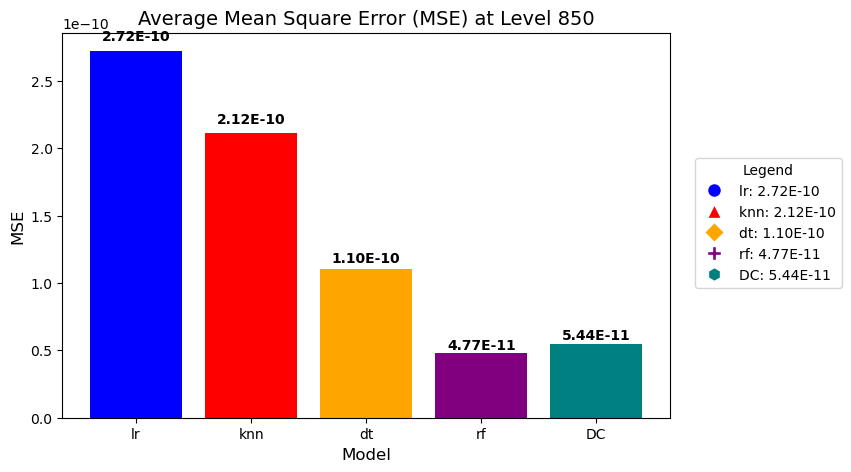

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_850.png


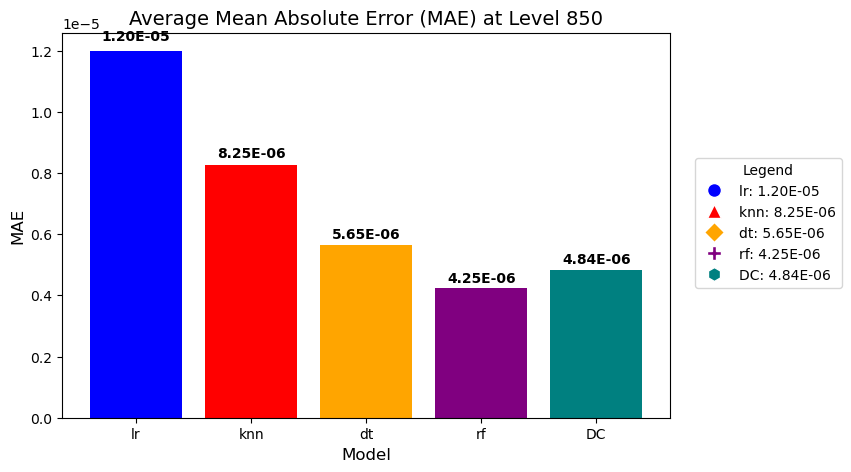

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_850.png


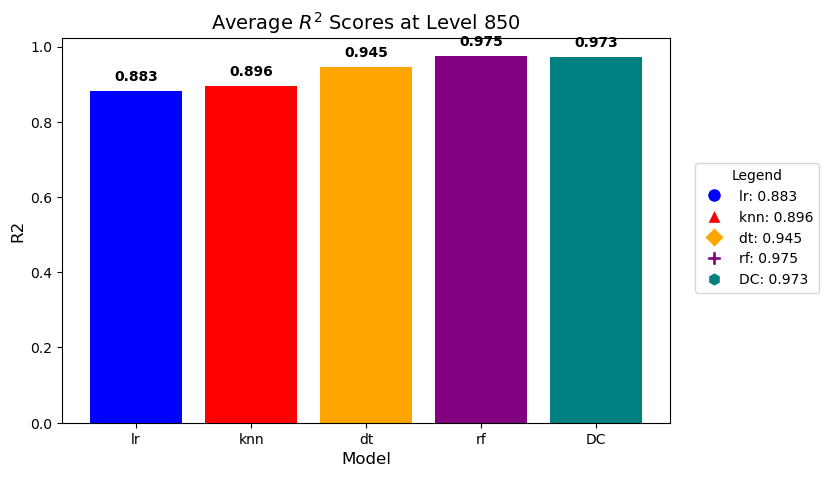

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_850.png


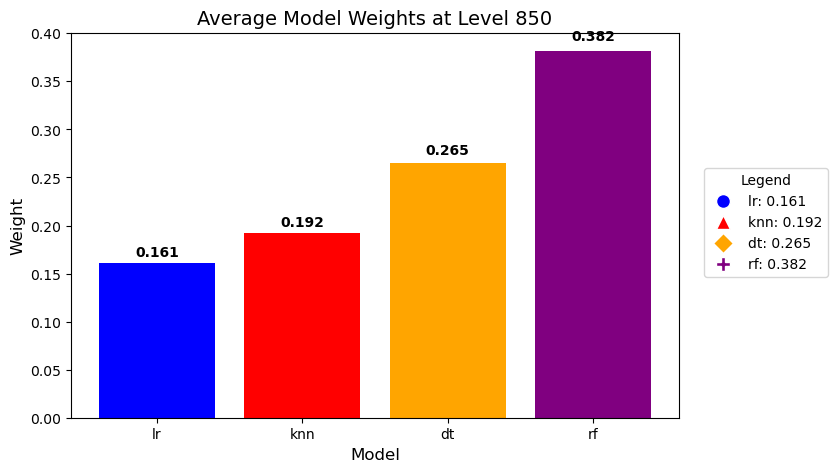

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_700.png


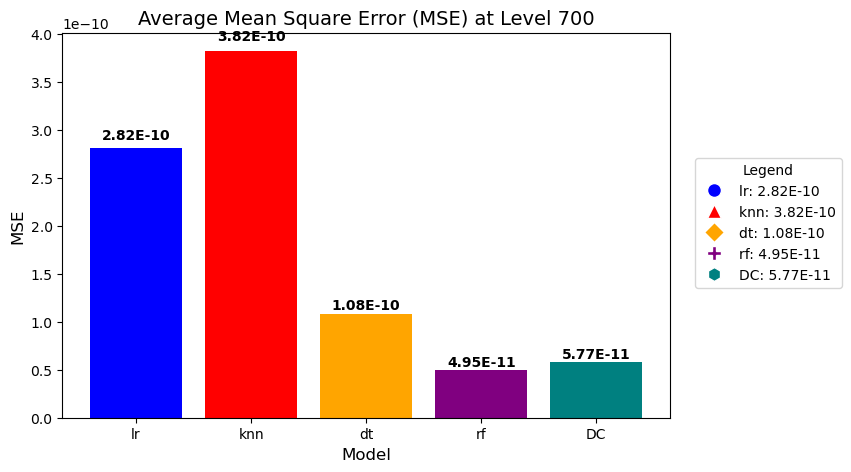

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_700.png


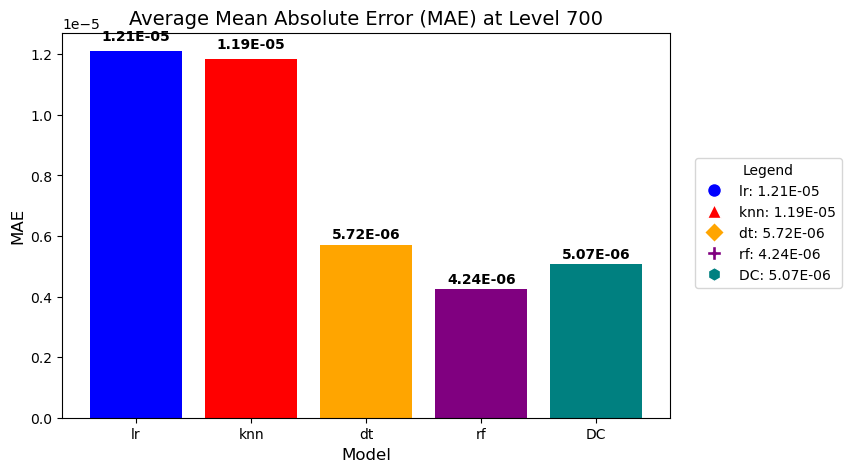

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_700.png


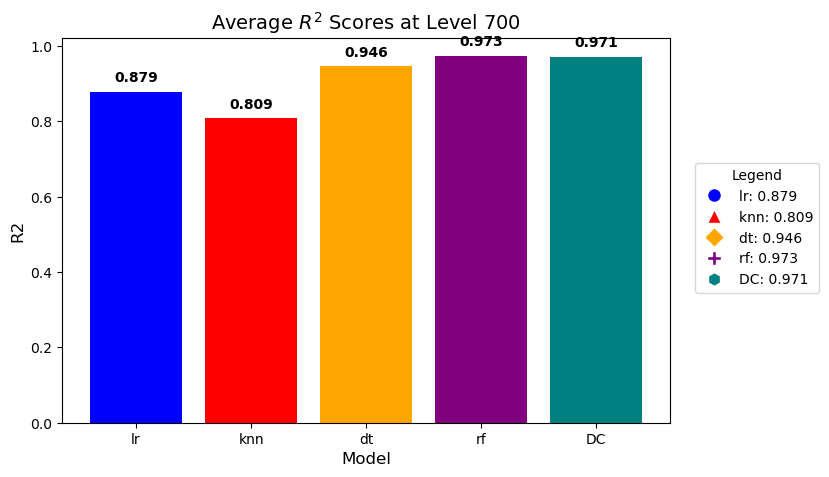

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_700.png


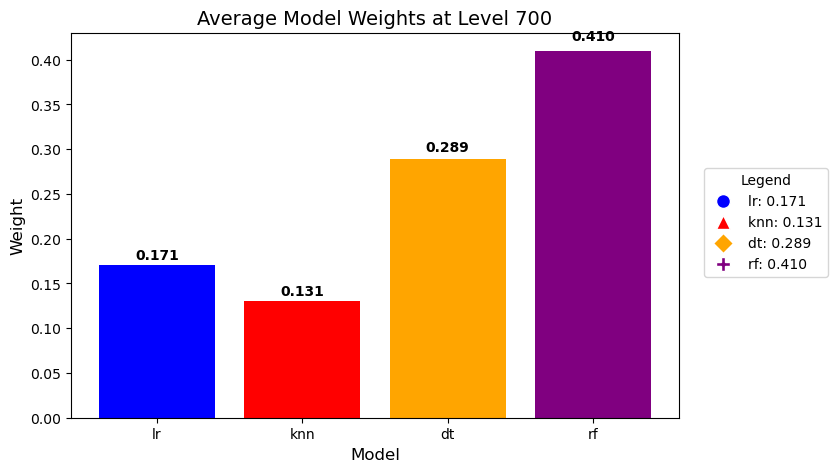

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_500.png


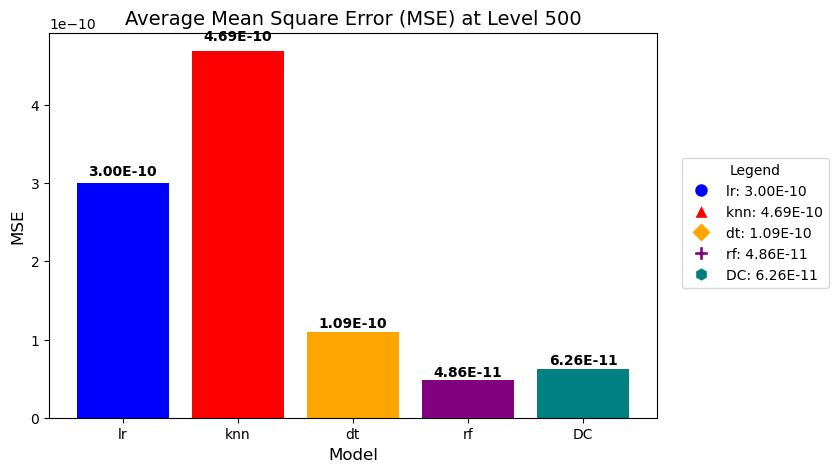

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_500.png


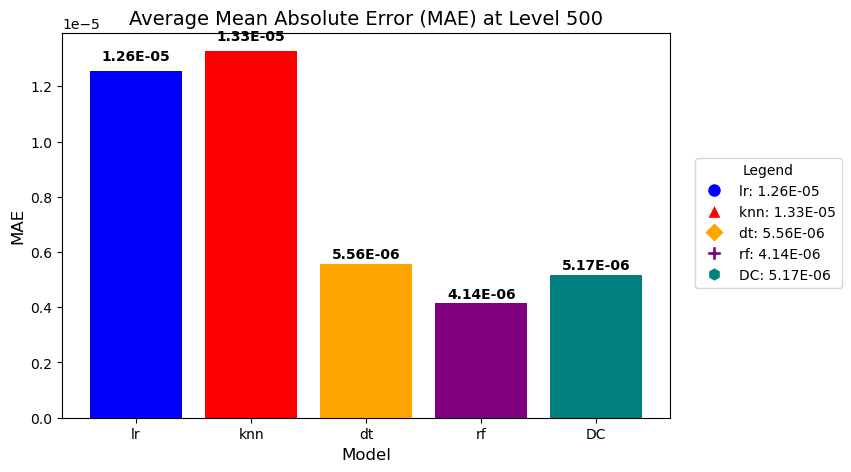

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_500.png


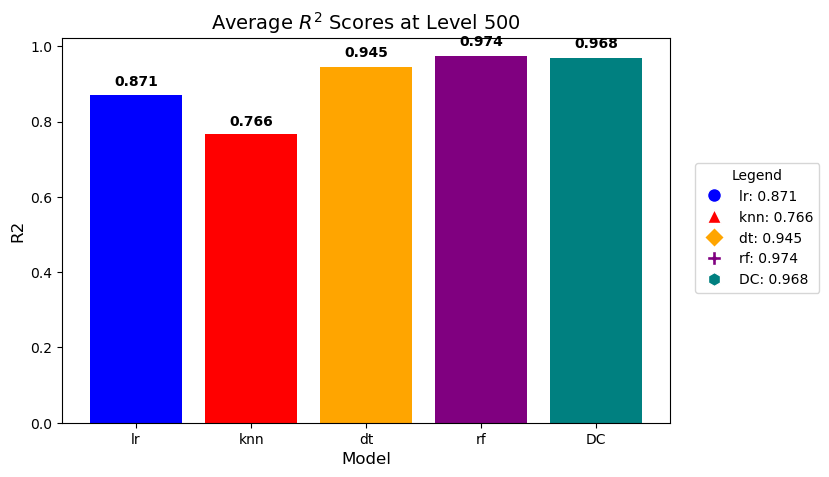

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_500.png


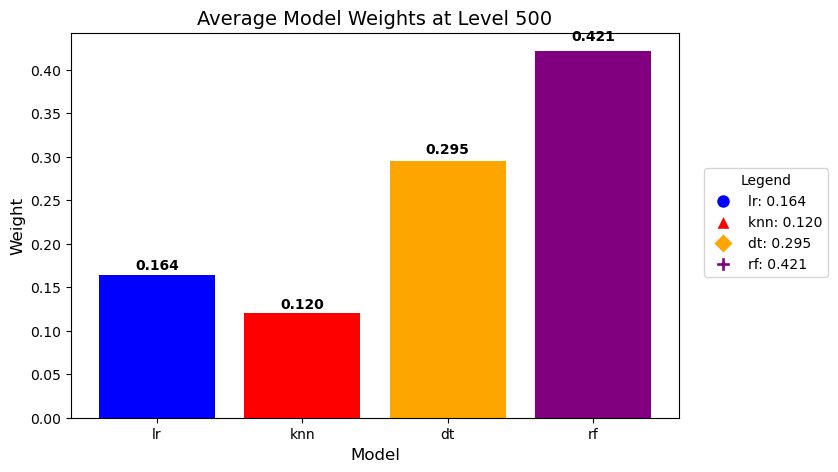

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_300.png


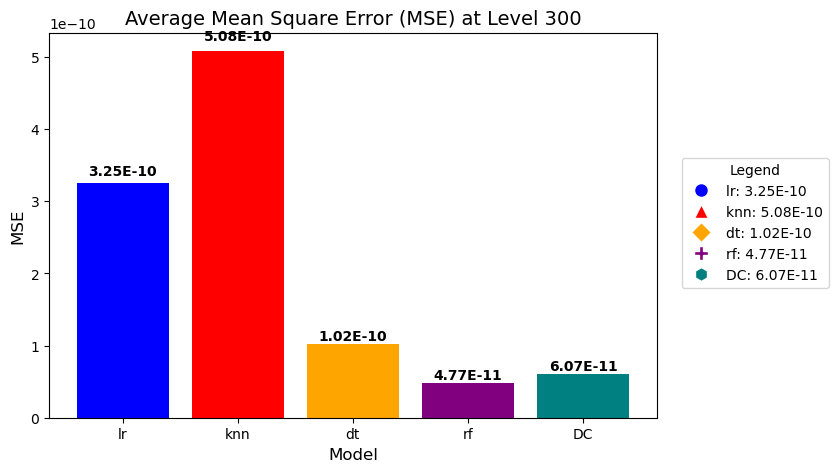

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_300.png


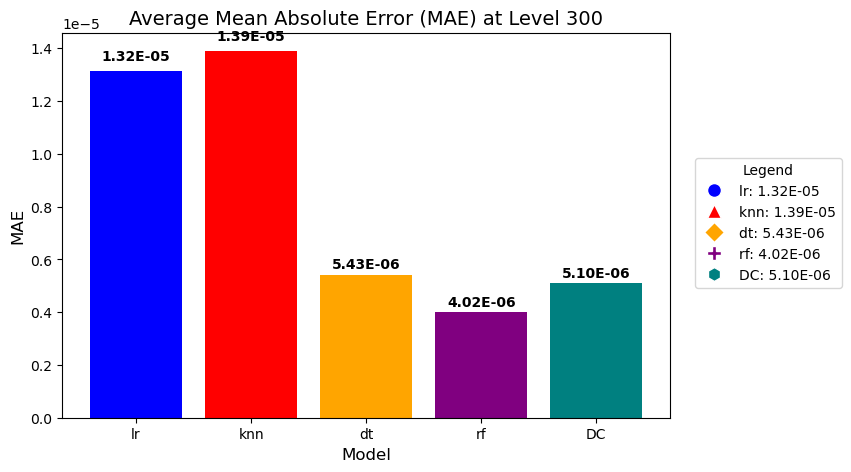

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_300.png


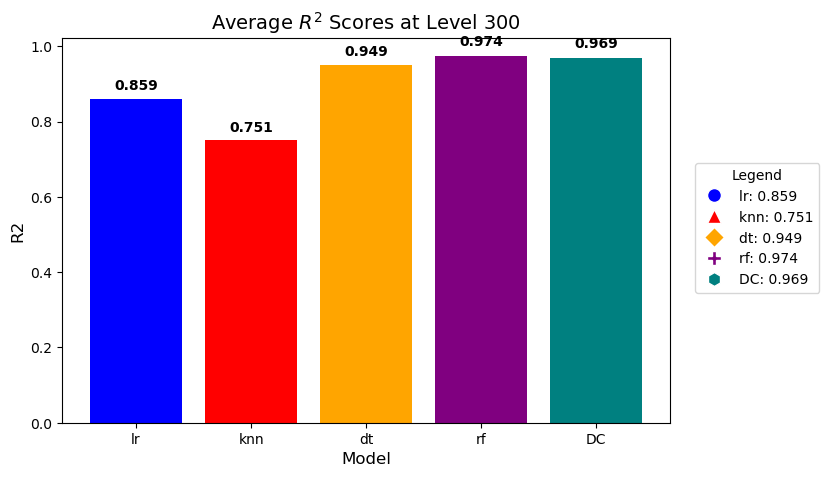

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_300.png


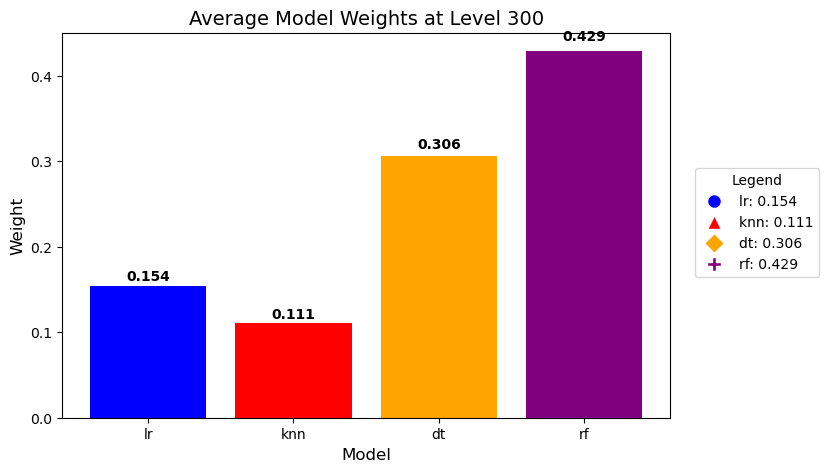

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_200.png


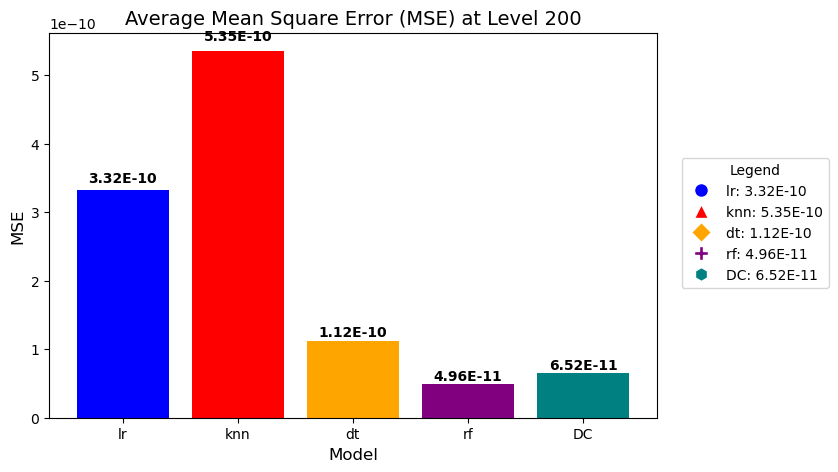

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_200.png


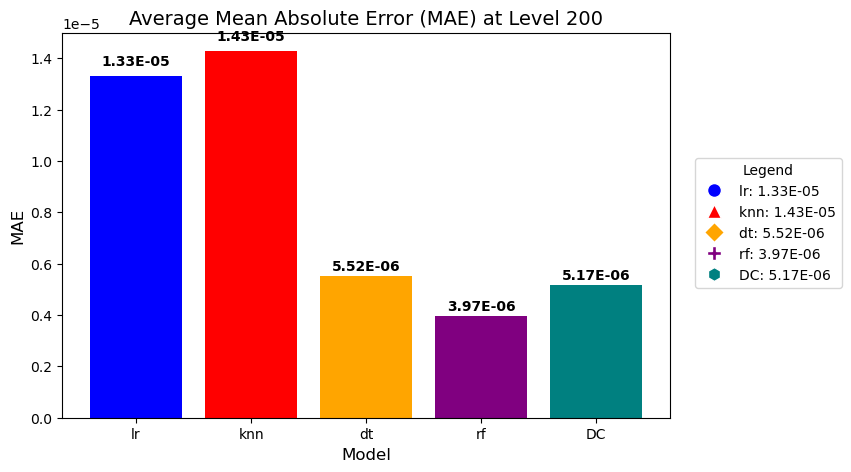

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_200.png


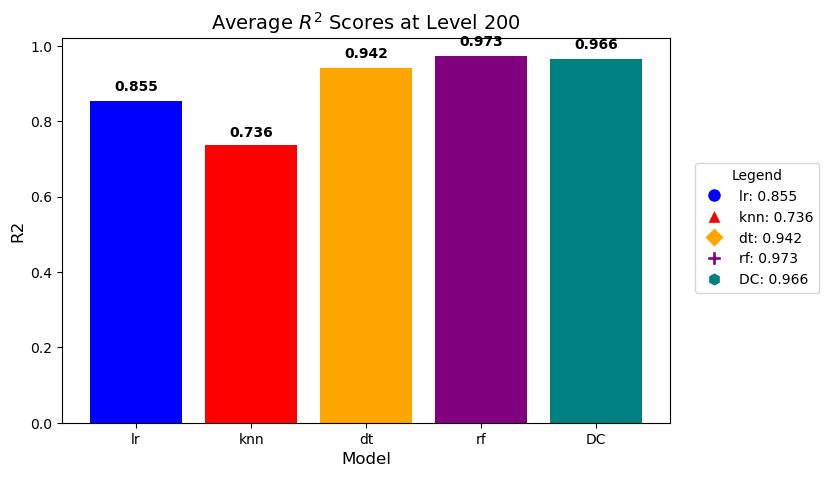

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_200.png


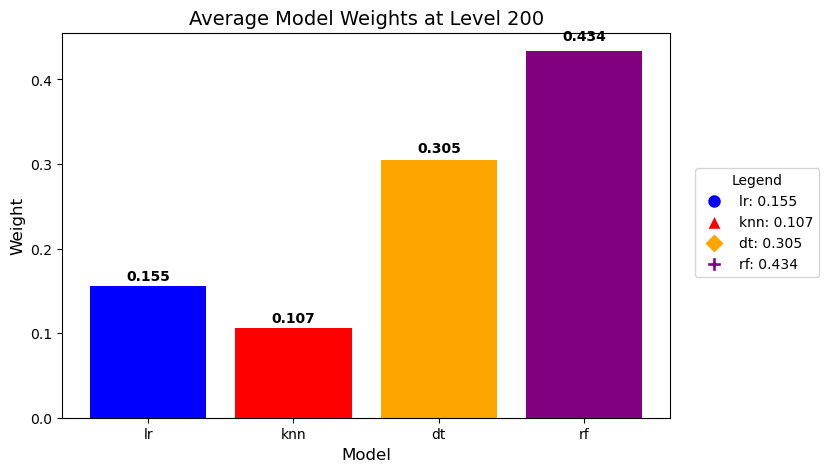

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_100.png


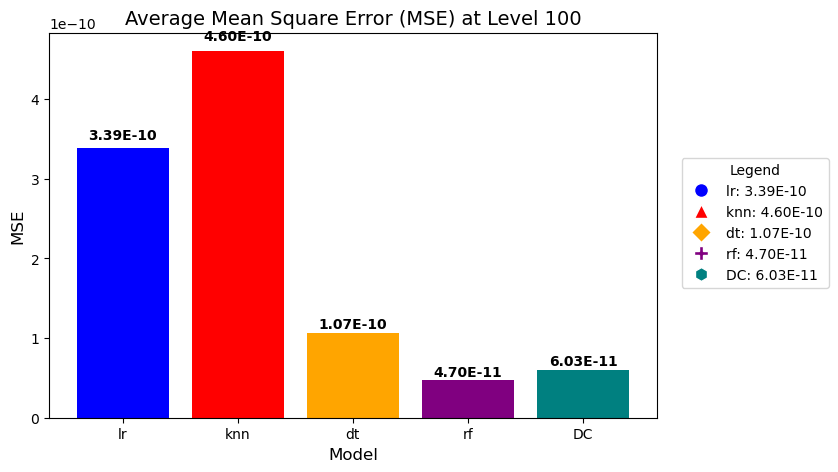

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_100.png


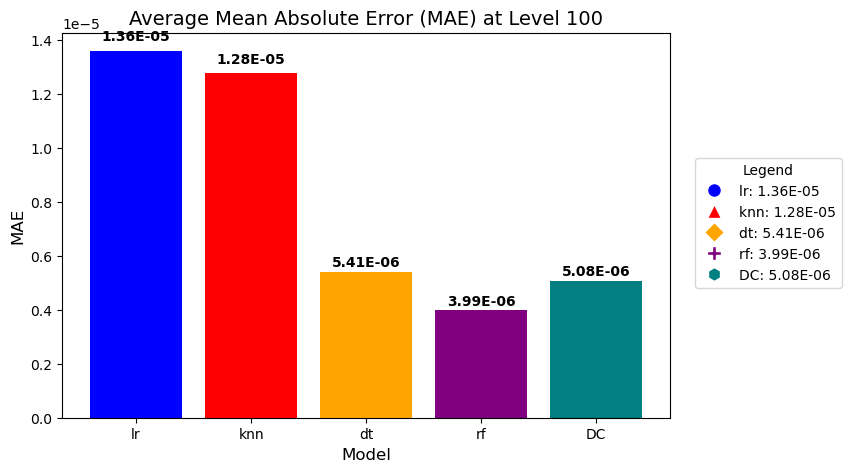

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_100.png


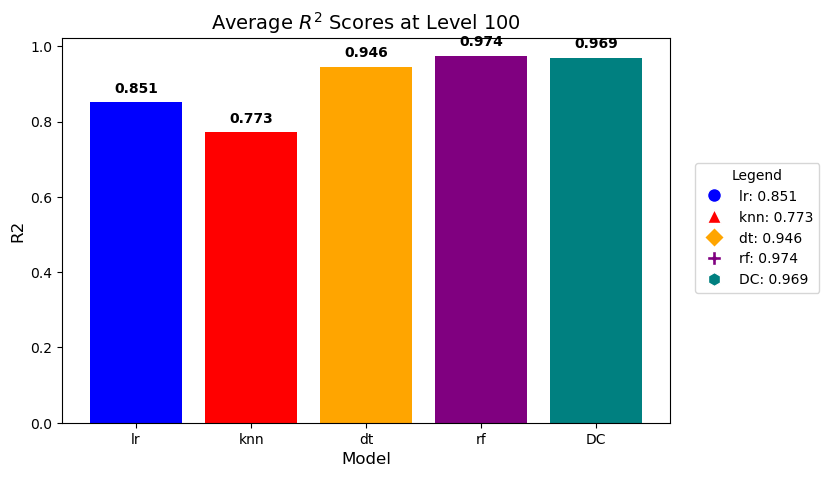

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_100.png


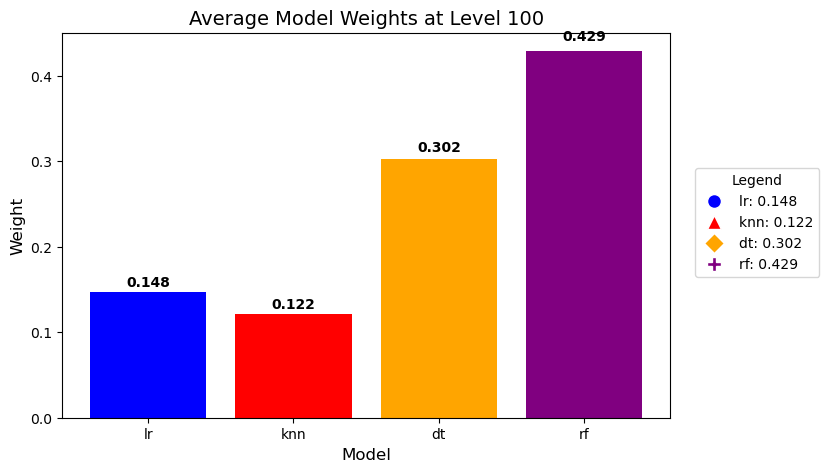

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_50.png


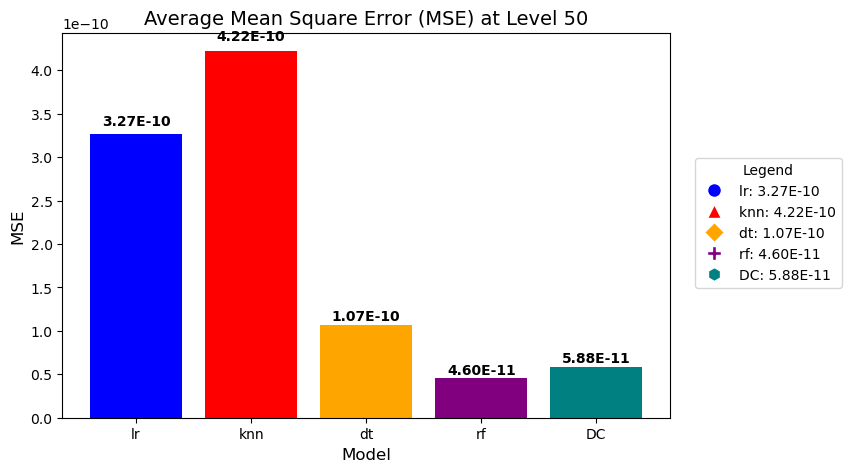

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_50.png


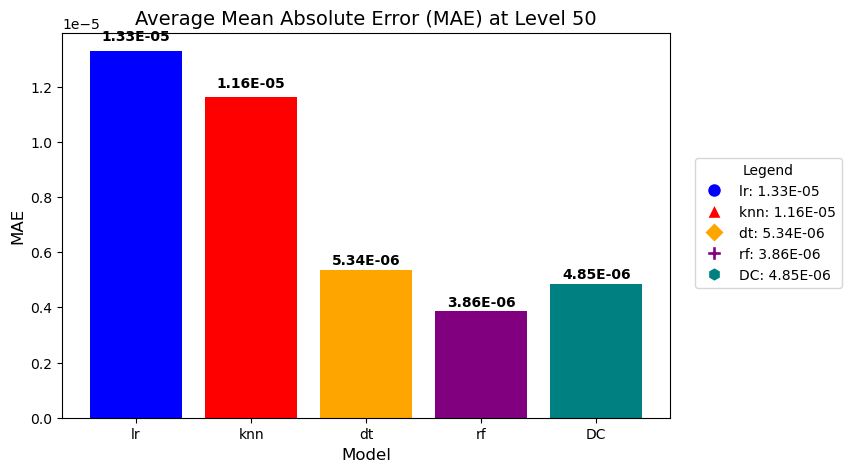

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_50.png


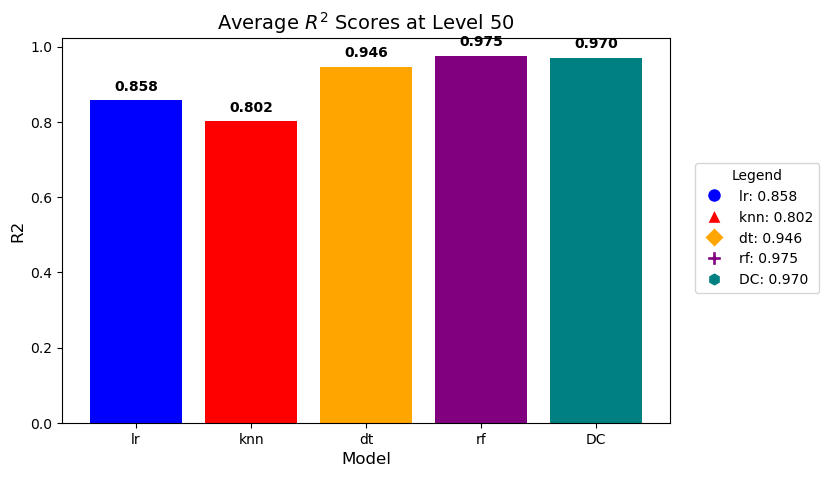

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_50.png


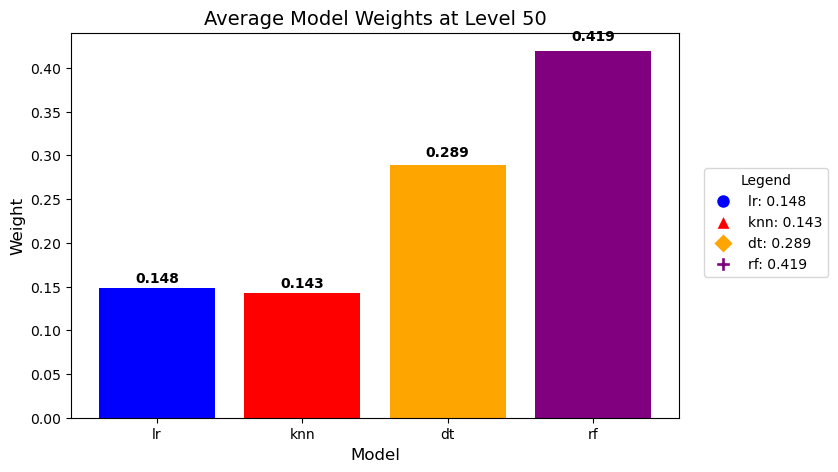

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_level_10.png


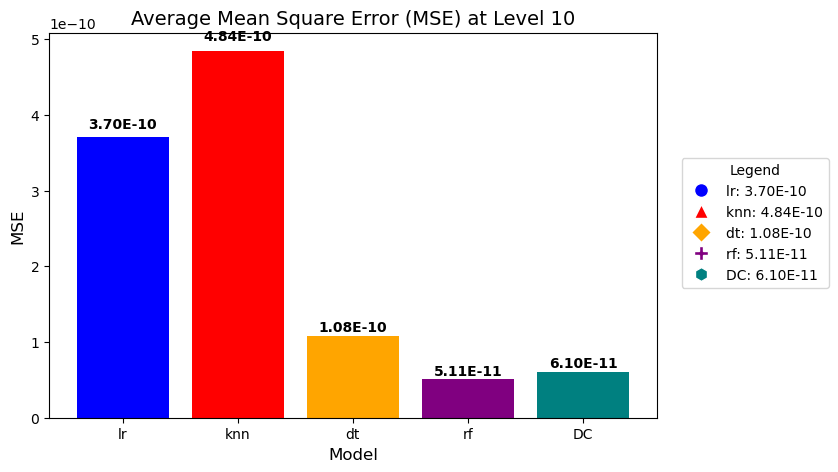

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_level_10.png


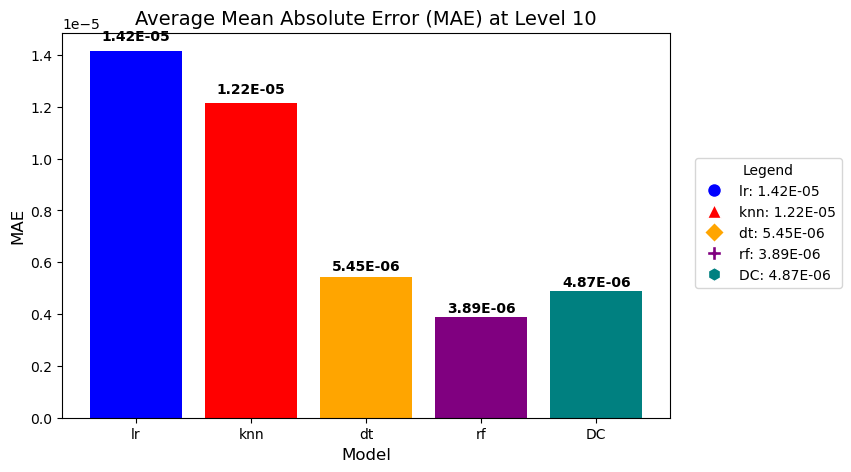

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_level_10.png


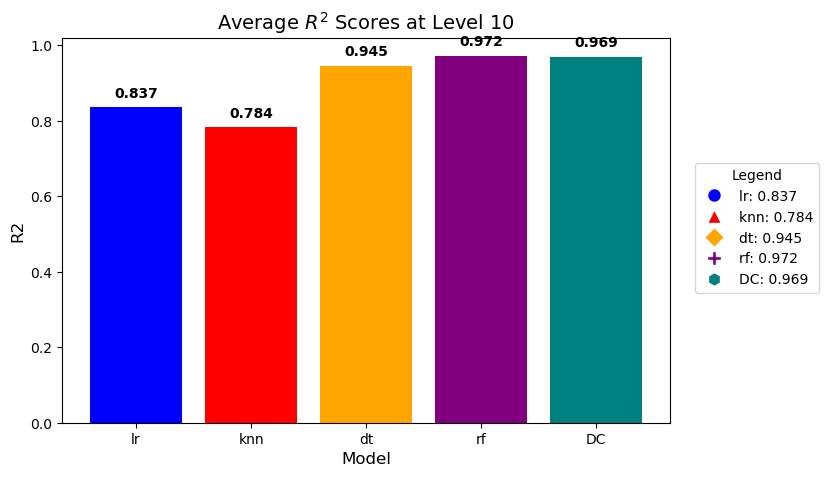

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_level_10.png


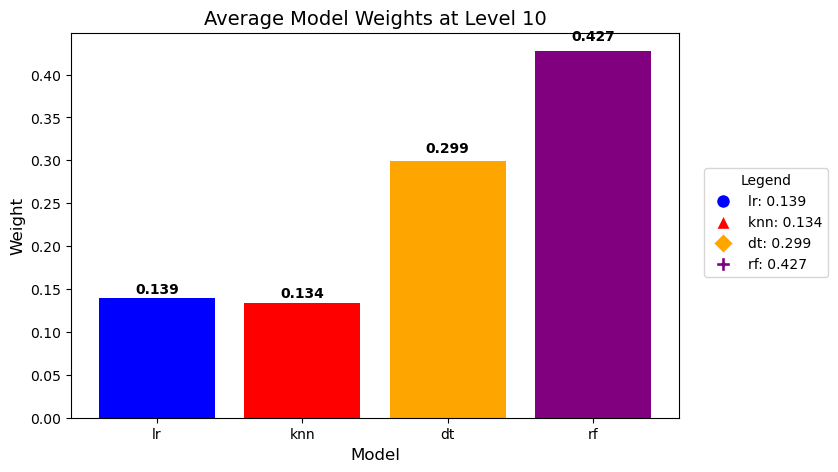

Overall aggregated metrics saved to Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\aggregated_model_metrics_overall.csv
Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MSE_overall.png


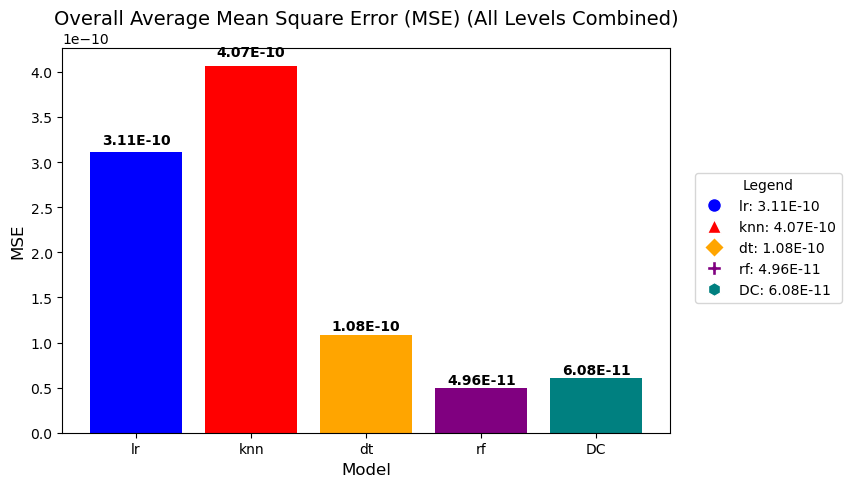

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_MAE_overall.png


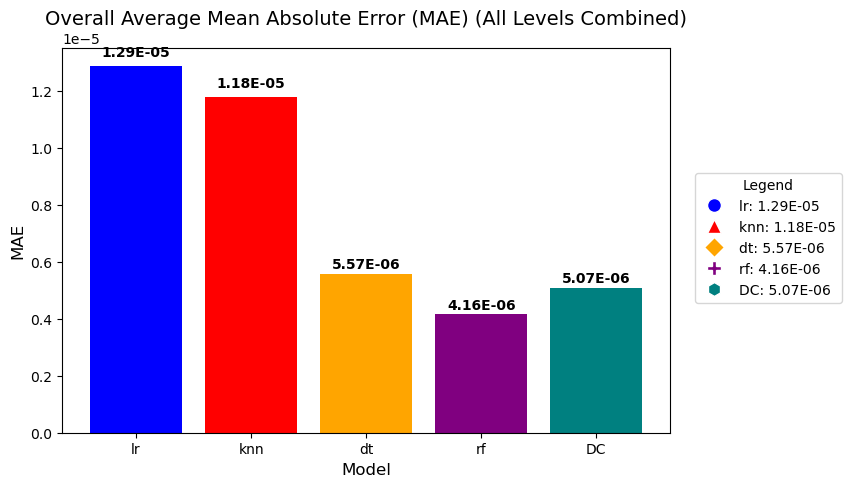

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_R2_overall.png


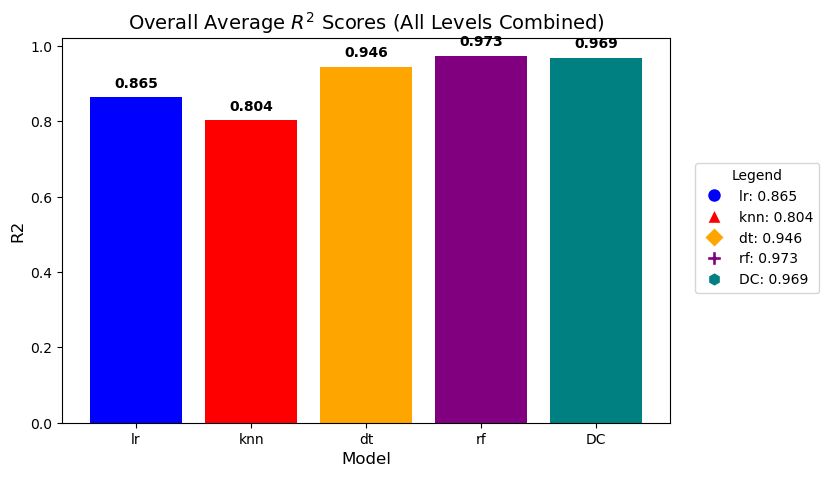

Saved plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots\average_Weight_overall.png


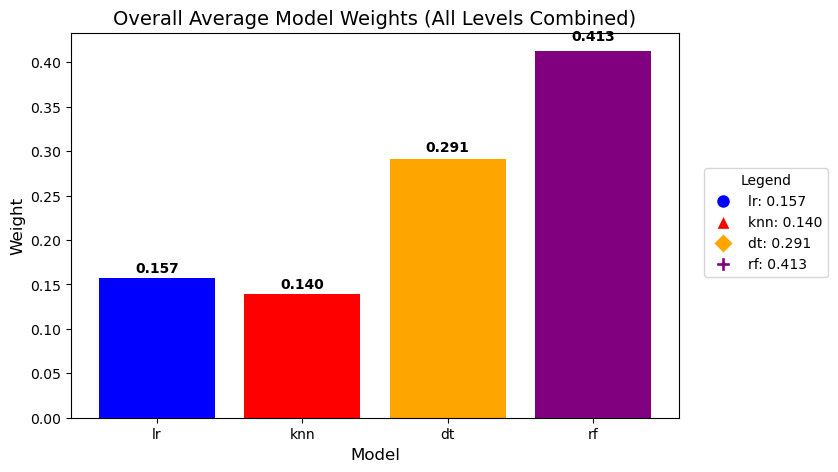

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Configuration and Setup
# -------------------------------

# File paths (update these paths if needed)
input_file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0061\ua_model_metrics_1980_&_2022_v0061.csv"
output_dir = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0061\model_metric_plots"
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Define the order of levels and models
levels_order = ['1000', '925', '850', '700', '500', '300', '200', '100', '50', '10']
models_order = ['lr', 'knn', 'dt', 'rf', 'ensemble']  # before renaming ensemble

# Define color and marker scheme for plotting.
# Note: ensemble is later renamed to 'DC'
model_styles = {
    'DC': ('teal', 'h'),  # DustCast (renamed ensemble)
    'lr': ('blue', 'o'),  # Linear Regression
    #'svr': ('green', 's'),  # Support Vector Regression
    'knn': ('red', '^'),  # K-Nearest Neighbors
    'dt': ('orange', 'D'),  # Decision Tree
    'rf': ('purple', 'P')  # Random Forest
}

# Metrics and titles for the plots
metrics = ['MSE', 'MAE', 'R2', 'Weight']
titles = {
    'MSE': "Mean Square Error (MSE)",
    'MAE': "Mean Absolute Error (MAE)",
    'R2': "$R^2$ Scores",
    'Weight': "Model Weights"
}

# -------------------------------
# Helper Functions
# -------------------------------

def add_value_labels(ax, bars, is_sci_notation=False):
    """Add value labels on top of each bar."""
    for bar in bars:
        height = bar.get_height()
        if is_sci_notation:
            label = f"{height:.2E}"  # Scientific notation
        else:
            label = f"{height:.3f}"
        ax.text(bar.get_x() + bar.get_width() / 2, height * 1.02, label,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

def plot_metric(df, metric, plot_title, filename, exclude_dc_for_weight=False):
    """
    Creates and saves a bar plot for the given metric from DataFrame 'df'.
    If exclude_dc_for_weight is True, the DC model is excluded.
    """
    plot_data = df.copy()
    if exclude_dc_for_weight:
        plot_data = plot_data[plot_data['Model'] != 'DC']
    
    # If there's no data to plot, return.
    if plot_data.empty:
        return

    fig, ax = plt.subplots(figsize=(9, 5))
    # Determine bar colors based on model_styles
    colors = [model_styles.get(m, ('gray', 'o'))[0] for m in plot_data['Model']]
    bars = ax.bar(plot_data['Model'], plot_data[metric], color=colors)
    ax.set_title(plot_title, fontsize=14)
    ax.set_xlabel("Model", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)

    if metric in ['MSE', 'MAE']:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        add_value_labels(ax, bars, is_sci_notation=True)
    else:
        add_value_labels(ax, bars, is_sci_notation=False)
    
    # Legend: Model Colors and their metric value.
    handles_colors = []
    labels_values = []
    for m in plot_data['Model']:
        if m in model_styles:
            marker = model_styles[m][1]
            color = model_styles[m][0]
            if m not in [h.get_label() for h in handles_colors]:
                handle = plt.Line2D([0], [0], marker=marker, color='w',
                                    markerfacecolor=color, markersize=10, label=m)
                handles_colors.append(handle)
                # Get the metric value for this model
                val = plot_data.loc[plot_data['Model'] == m, metric].values[0]
                if metric in ['MSE', 'MAE']:
                    value_str = f"{val:.2E}"
                else:
                    value_str = f"{val:.3f}"
                labels_values.append(f"{m}: {value_str}")
    
    # Adjust the subplot to make room for the legend on the right
    fig.subplots_adjust(right=0.80)
    plt.figlegend(handles_colors, labels_values, loc='center left', title="Legend", bbox_to_anchor=(0.82, 0.5))
    
    save_path = os.path.join(output_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved plot: {save_path}")
    plt.show()

# -------------------------------
# Main Processing
# -------------------------------

def main():
    # Load the dataset
    data = pd.read_csv(input_file_path)
    
    # Ensure Level is treated as a string to preserve ordering
    data['Level'] = data['Level'].astype(str)
    
    # Rename ensemble model to 'DC'
    data['Model'] = data['Model'].replace({'ensemble': 'DC'})
    
    # -------------------------------
    # Per-Level Aggregation
    # -------------------------------
    # Compute average metrics for each combination of Level and Model
    agg_data = data.groupby(['Level', 'Model'], as_index=False)[metrics].mean()
    
    # Enforce ordering for levels and models
    agg_data['Level'] = pd.Categorical(agg_data['Level'], categories=levels_order, ordered=True)
    # For models, ensure DC replaces ensemble
    agg_data['Model'] = pd.Categorical(agg_data['Model'],
                                       categories=[m if m != 'ensemble' else 'DC' for m in models_order],
                                       ordered=True)
    agg_data.sort_values(['Level', 'Model'], inplace=True)
    
    # Write per-level aggregated metrics to a CSV file
    per_level_csv = os.path.join(output_dir, "aggregated_model_metrics_per_level.csv")
    agg_data.to_csv(per_level_csv, index=False)
    print(f"Per-level aggregated metrics saved to {per_level_csv}")
    
    # Produce plots for each level and each metric
    for level in levels_order:
        level_data = agg_data[agg_data['Level'] == level]
        for metric in metrics:
            # For Weight, exclude DC as in original code
            plot_title = f"Average {titles[metric]} at Level {level}"
            filename = f"average_{metric}_level_{level}.png"
            plot_metric(level_data, metric, plot_title, filename, exclude_dc_for_weight=(metric=="Weight"))
    
    # -------------------------------
    # Overall Aggregation (across all levels)
    # -------------------------------
    overall_agg = data.groupby('Model', as_index=False)[metrics].mean()
    
    # Ensure model ordering; note that ensemble was renamed to DC
    overall_agg['Model'] = pd.Categorical(overall_agg['Model'],
                                          categories=[m if m != 'ensemble' else 'DC' for m in models_order],
                                          ordered=True)
    overall_agg.sort_values('Model', inplace=True)
    
    # Write overall aggregated metrics to a CSV file
    overall_csv = os.path.join(output_dir, "aggregated_model_metrics_overall.csv")
    overall_agg.to_csv(overall_csv, index=False)
    print(f"Overall aggregated metrics saved to {overall_csv}")
    
    # Produce overall plots for each metric
    for metric in metrics:
        plot_title = f"Overall Average {titles[metric]} (All Levels Combined)"
        filename = f"average_{metric}_overall.png"
        plot_metric(overall_agg, metric, plot_title, filename, exclude_dc_for_weight=(metric=="Weight"))
    
if __name__ == "__main__":
    main()


Feature Importance

Processing per-level feature importance plots...
Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_1000.png


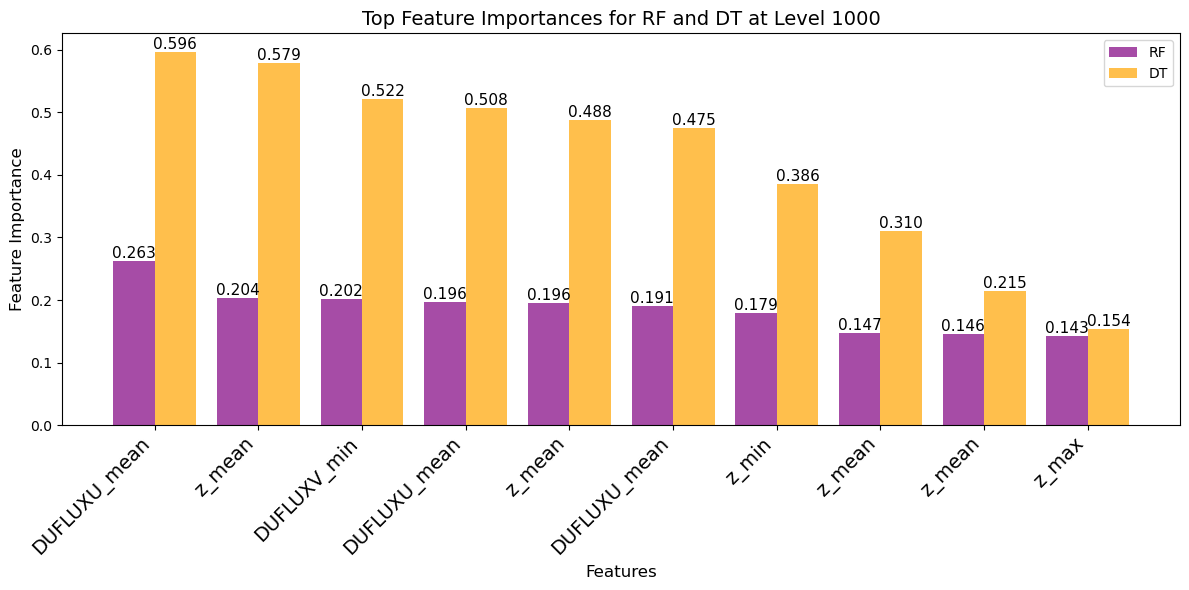

Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_925.png


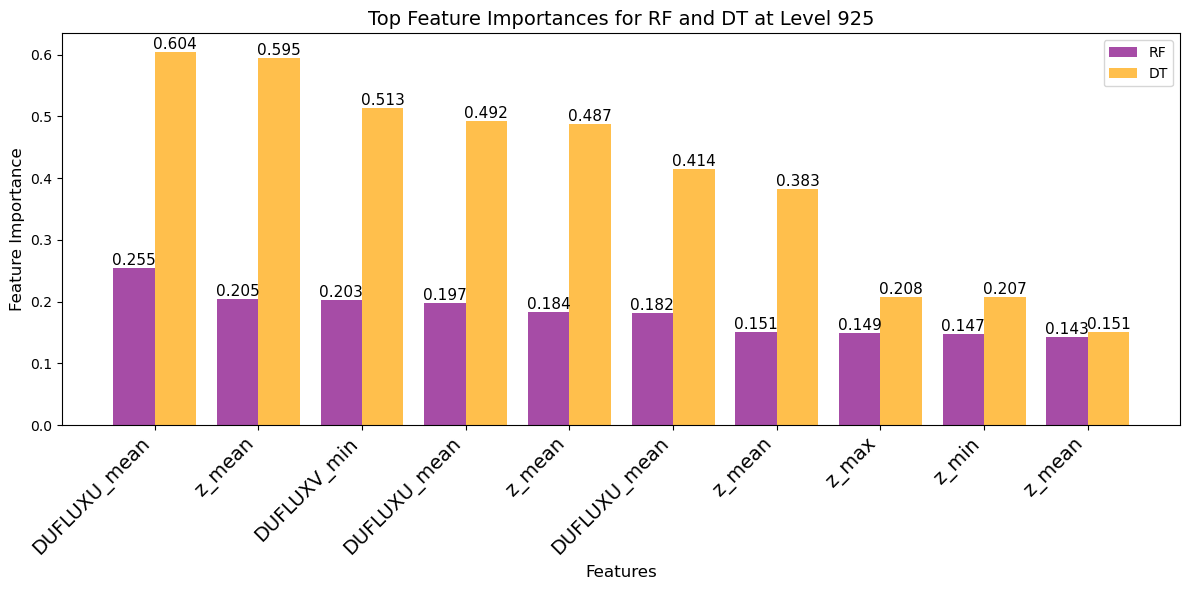

Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_850.png


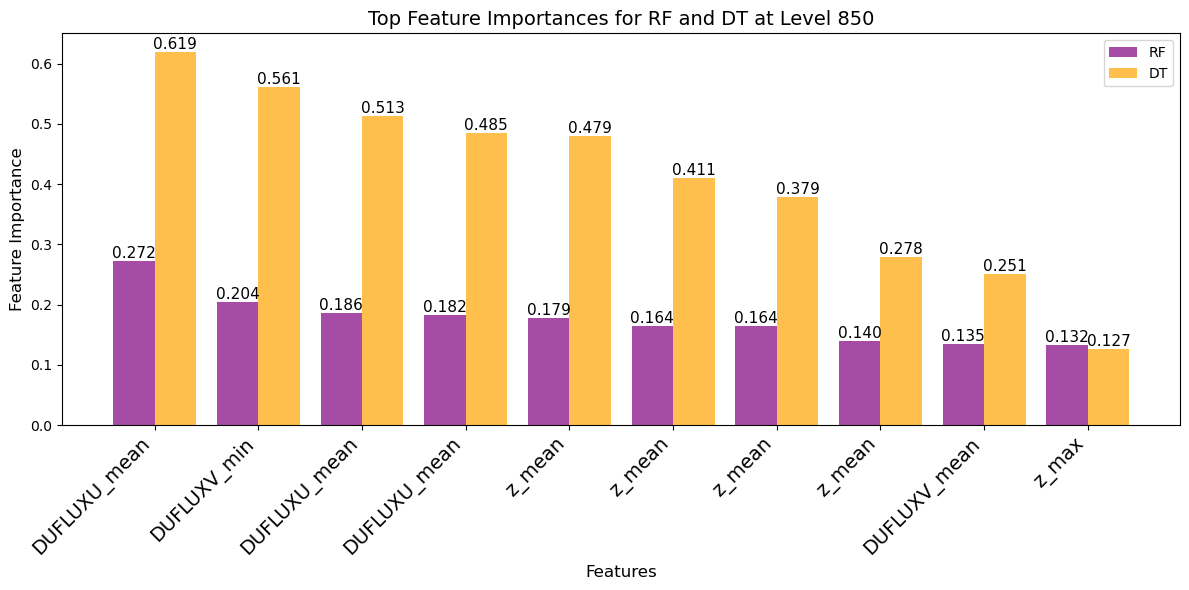

Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_700.png


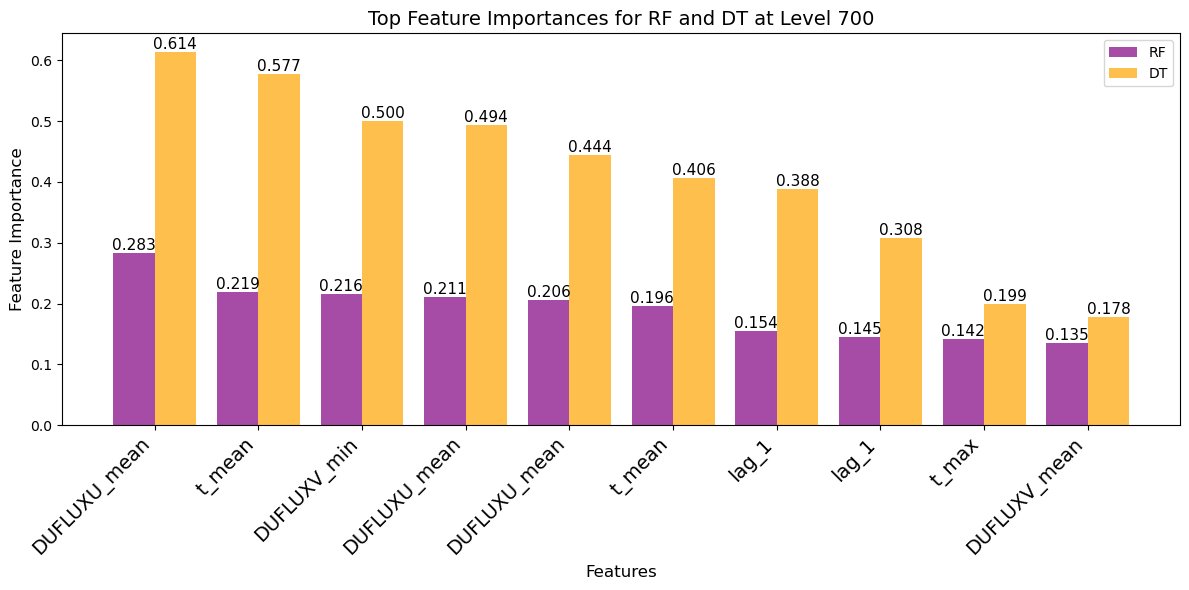

Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_500.png


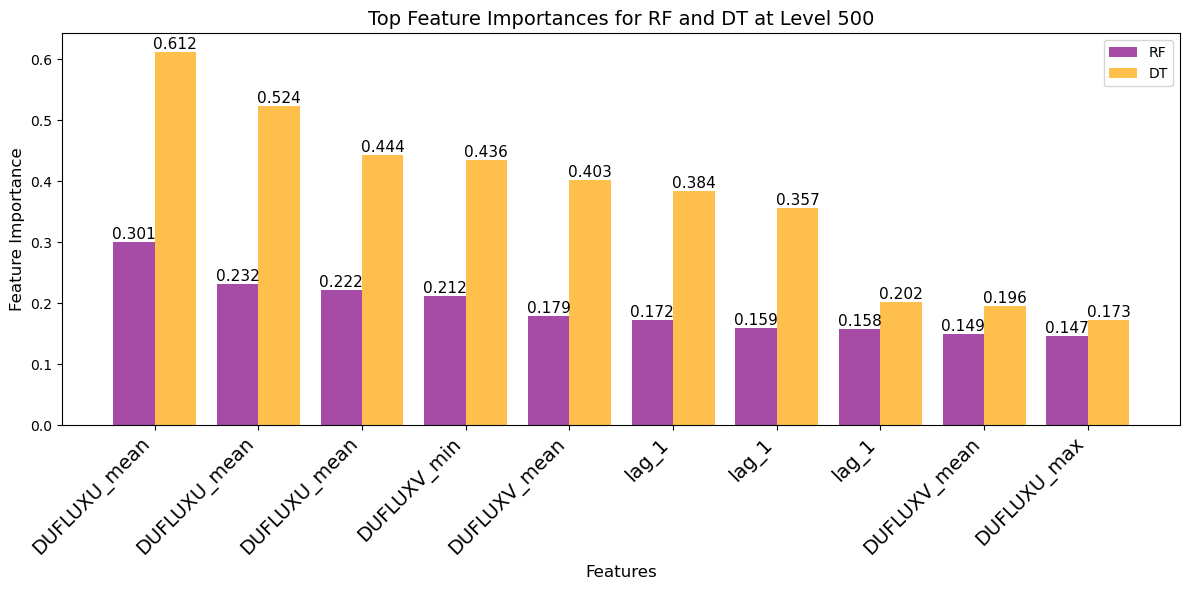

Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_300.png


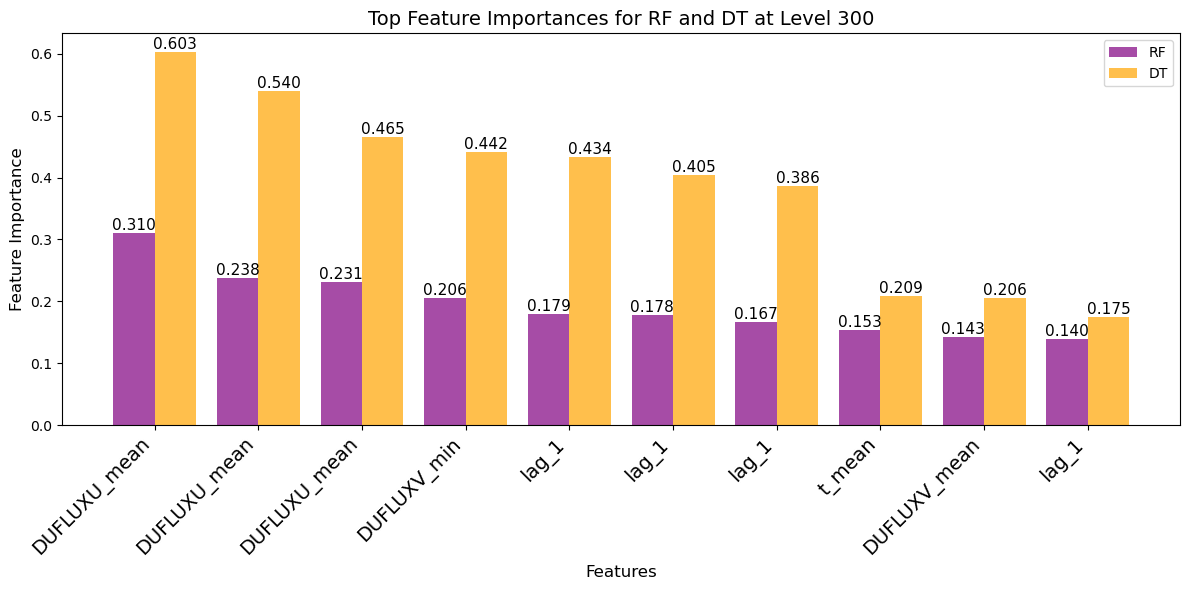

Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_200.png


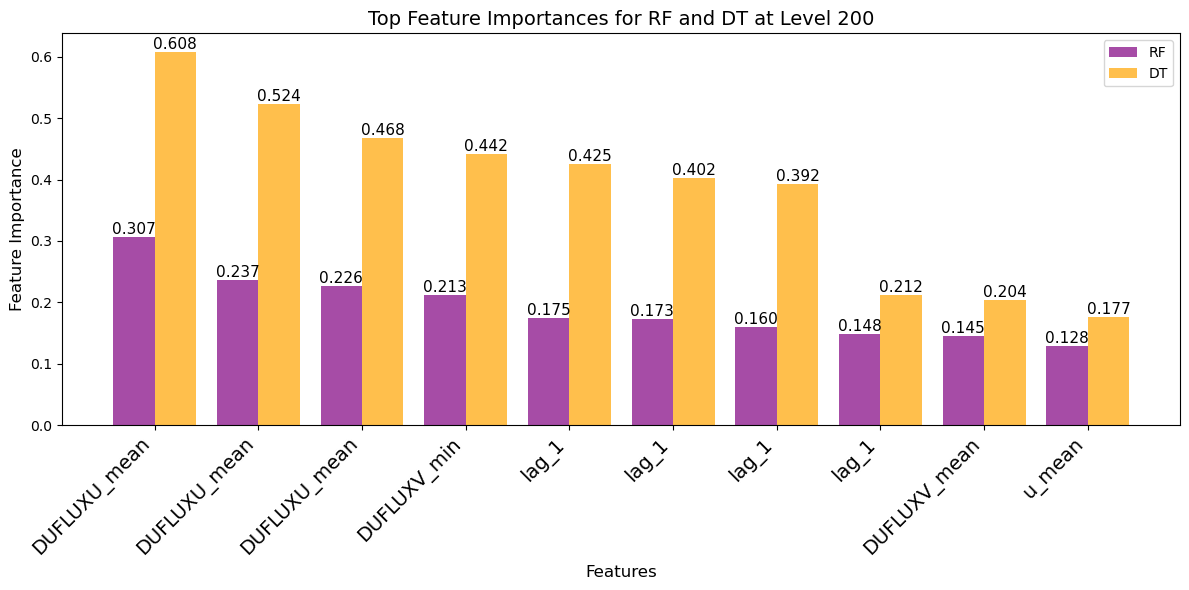

Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_100.png


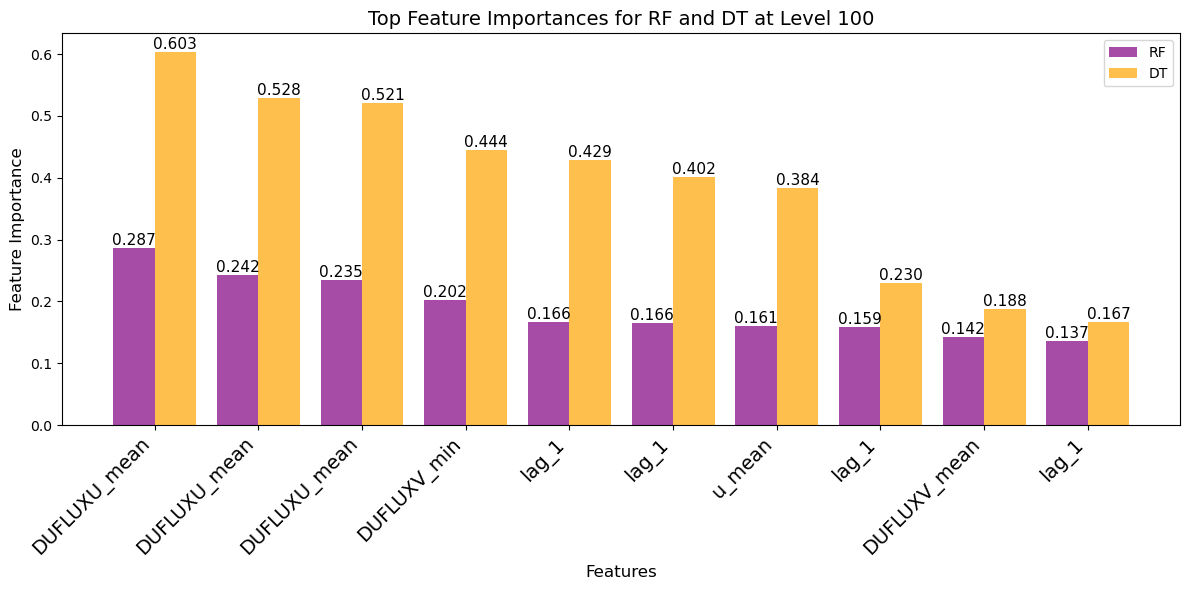

Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_50.png


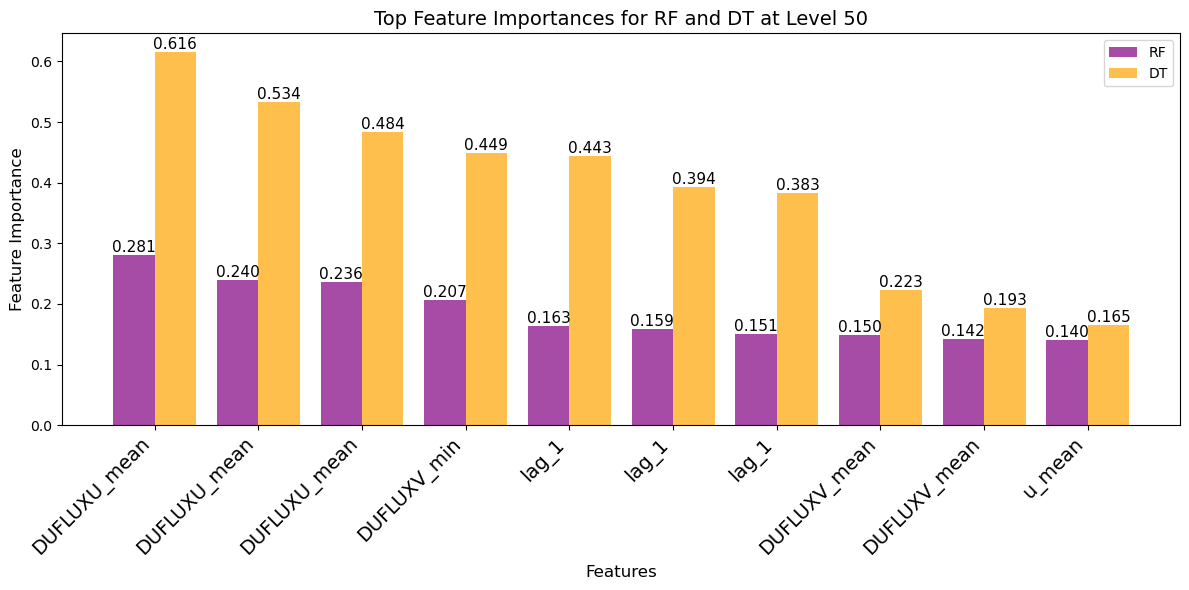

Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_level_10.png


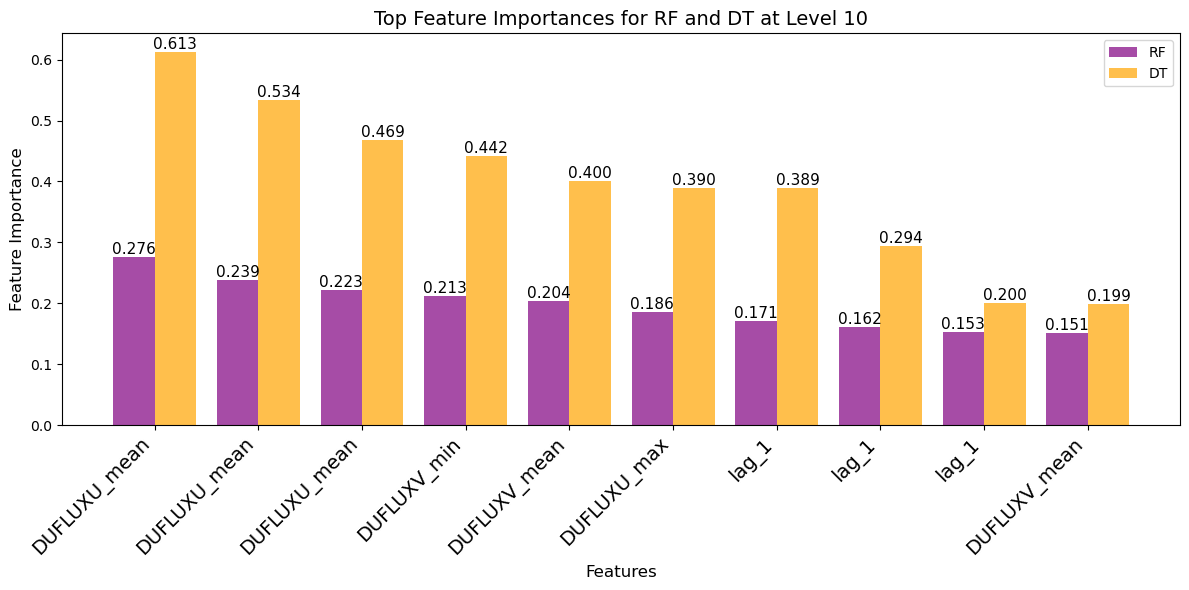

Processing overall feature importance plot across all levels...
Saved feature importance plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots\feature_importance_overall.png


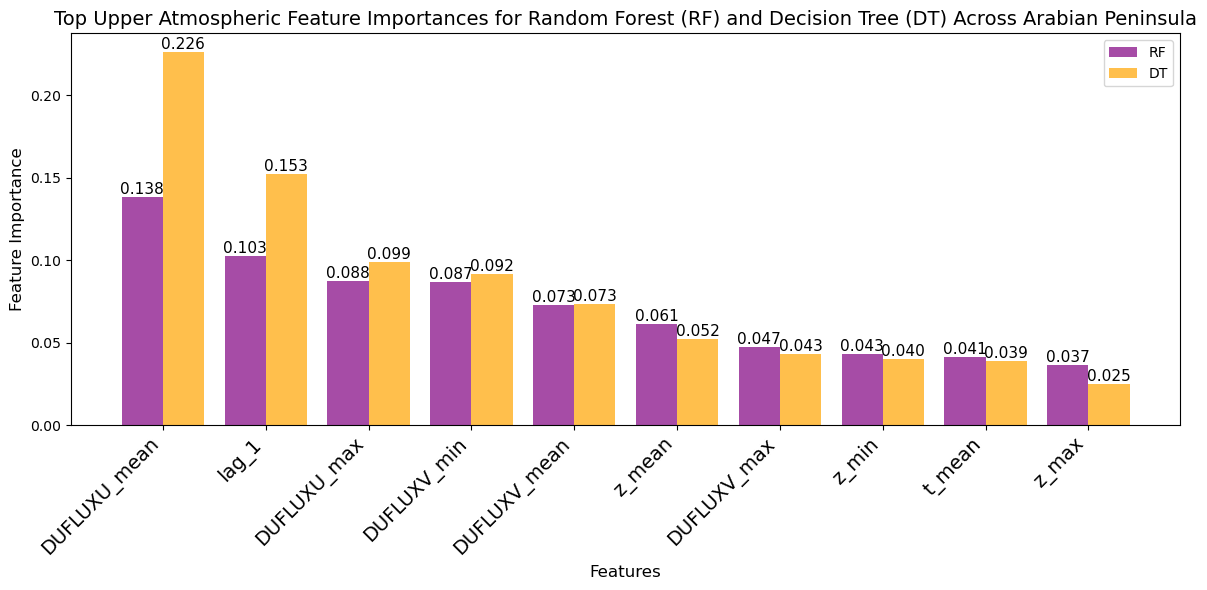

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Configuration and Setup
# -------------------------------

# File paths for feature importance CSV and output directory for plots
input_file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\ua_feature_importances_2023_v0063.csv"
output_dir = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\feature_importance_plots"
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Define the order of levels (all ten levels)
levels_order = ['1000', '925', '850', '700', '500', '300', '200', '100', '50', '10']

# -------------------------------
# Helper Function to Plot Feature Importances
# -------------------------------

def plot_feature_importance(top_features_rf, top_features_dt, title, filename):
    """
    Plots side-by-side bar charts for top feature importances for RF and DT.
    top_features_rf and top_features_dt should be dataframes with columns 'Feature' and the respective importance.
    """
    bar_width = 0.4
    # Use the top features from RF to define the x-axis positions.
    indices = np.arange(len(top_features_rf))
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the RF and DT bars
    bars_rf = ax.bar(indices - bar_width / 2, top_features_rf['rf'], bar_width,
                     label='RF', color='purple', alpha=0.7)
    bars_dt = ax.bar(indices + bar_width / 2, top_features_dt['dt'], bar_width,
                     label='DT', color='orange', alpha=0.7)
    
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Feature Importance', fontsize=12)
    ax.set_xlabel('Features', fontsize=12)
    ax.set_xticks(indices)
    ax.set_xticklabels(top_features_rf['Feature'], rotation=45, ha='right', fontsize=14)
    ax.legend()
    
    # Add text labels on the RF bars
    for bar in bars_rf:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=11)
    
    # Add text labels on the DT bars
    for bar in bars_dt:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=11)
    
    fig.tight_layout()
    
    # Save the plot
    save_path = os.path.join(output_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved feature importance plot: {save_path}")
    plt.show()

# -------------------------------
# Main Processing
# -------------------------------

def main():
    # Load the feature importance dataset
    feature_importances_data = pd.read_csv(input_file_path)
    
    # Ensure that the Level column is of type string (if not already)
    if 'Level' in feature_importances_data.columns:
        feature_importances_data['Level'] = feature_importances_data['Level'].astype(str)
    
    # -------------------------------
    # Per-Level Feature Importance
    # -------------------------------
    print("Processing per-level feature importance plots...")
    # Loop through each level (in the defined order)
    for level in levels_order:
        # Filter the data for the current level
        level_data = feature_importances_data[feature_importances_data['Level'] == level]
        if level_data.empty:
            print(f"No data available for Level {level}. Skipping...")
            continue

        # For RF: select top 10 features by 'rf'
        top_features_rf = level_data[['Feature', 'rf']].sort_values(by='rf', ascending=False).head(10)
        # For DT: select top 10 features by 'dt'
        top_features_dt = level_data[['Feature', 'dt']].sort_values(by='dt', ascending=False).head(10)
        
        # Note: In this example we use the RF top features to set the x-axis.
        title = f"Top Feature Importances for RF and DT at Level {level}"
        filename = f"feature_importance_level_{level}.png"
        plot_feature_importance(top_features_rf, top_features_dt, title, filename)
    
    # -------------------------------
    # Overall Feature Importance (Across All Levels)
    # -------------------------------
    print("Processing overall feature importance plot across all levels...")
    # Compute the average feature importance for each feature (grouped by Feature)
    average_feature_importance = feature_importances_data.groupby("Feature")[["rf", "dt"]].mean().reset_index()
    
    # Select the top 10 features for RF and DT from the overall average
    top_features_rf_overall = average_feature_importance[['Feature', 'rf']].sort_values(by='rf', ascending=False).head(10)
    top_features_dt_overall = average_feature_importance[['Feature', 'dt']].sort_values(by='dt', ascending=False).head(10)
    
    title_overall = "Top Upper Atmospheric Feature Importances for Random Forest (RF) and Decision Tree (DT) Across Arabian Peninsula"
    filename_overall = "feature_importance_overall.png"
    plot_feature_importance(top_features_rf_overall, top_features_dt_overall, title_overall, filename_overall)

if __name__ == "__main__":
    main()


Pearsons R 

In [12]:
import pandas as pd
import numpy as np

# -------------------------------
# Configuration and File Paths
# -------------------------------

# Input file: row-level predictions (for the entire Arabian Peninsula)
input_file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\ua_row_level_predictions_2023_v0063.csv"

# Output file: save the Pearson correlation matrix for the entire region
output_file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\Pearsons_R_entire_AP.csv"

# -------------------------------
# Load the Dataset
# -------------------------------

data = pd.read_csv(input_file_path)

# -------------------------------
# Select Numeric Columns Only
# -------------------------------
# This step drops non-numeric columns (like 'time' or 'Country') so that only numerical features are included.
numeric_data = data.select_dtypes(include=[np.number])

# -------------------------------
# Compute Pearson Correlation Matrix
# -------------------------------

cor_matrix = numeric_data.corr(method='pearson')

# -------------------------------
# Save the Correlation Matrix to CSV
# -------------------------------

cor_matrix.to_csv(output_file_path, index=True)
print(f"Pearson correlation matrix for the entire Arabian Peninsula saved to {output_file_path}")


Pearson correlation matrix for the entire Arabian Peninsula saved to Z:\Thesis\Data\test\DustCast\UA\DC_v0063\Pearsons_R_entire_AP.csv


Correlation heatmap

Saved Pearson correlation heatmap: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\correlation_plots\pearson_heatmap.png


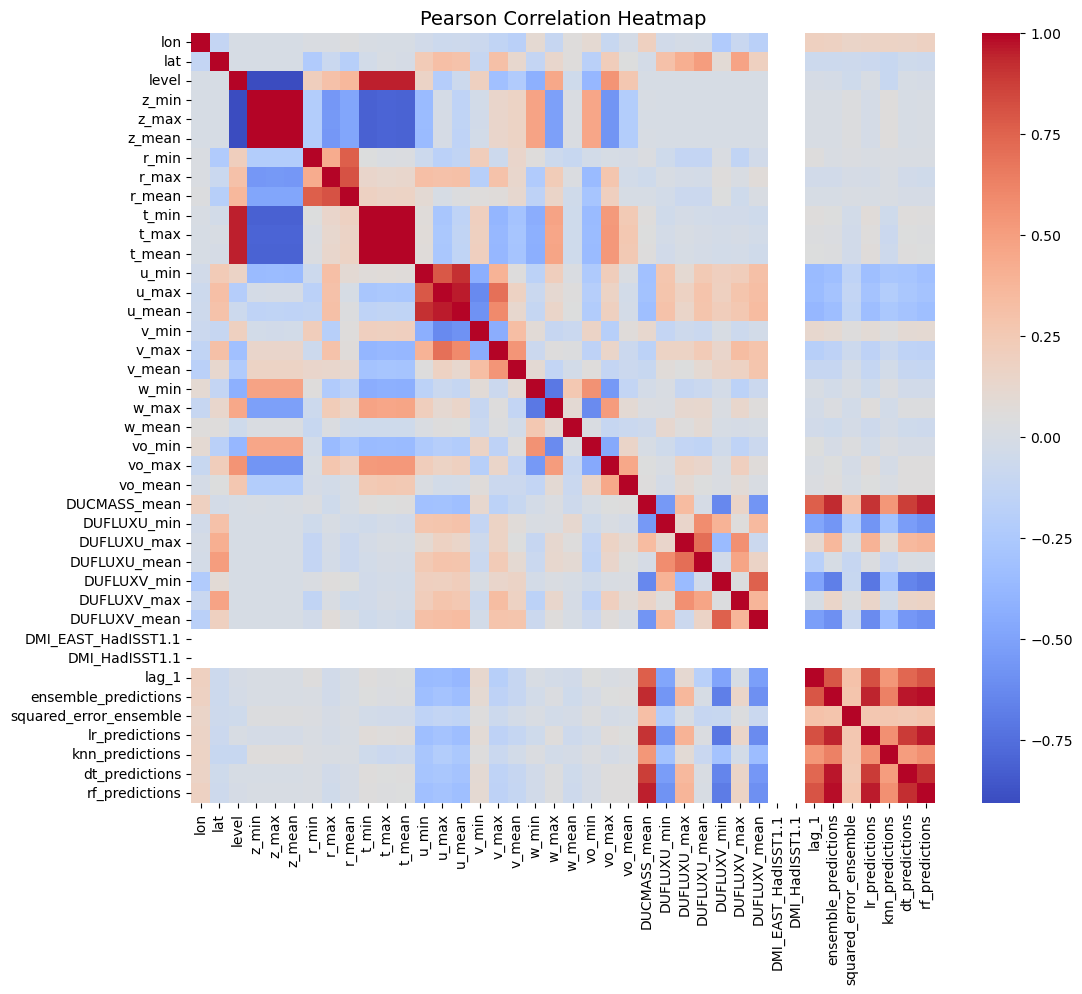

OSError: Cannot save file into a non-existent directory: 'Z:\Thesis\Data\test\DustCast\UA\DC_v0061'

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pearson correlation matrix from CSV
file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\Pearsons_R_entire_AP.csv"
cor_matrix = pd.read_csv(file_path, index_col=0)

# Define output directory for correlation plots
output_dir = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\correlation_plots"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

# Plot heatmap without annotations
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=False, cbar=True, cmap="coolwarm", ax=ax)
ax.set_title('Pearson Correlation Heatmap', fontsize=14)

# Save the heatmap
heatmap_save_path = os.path.join(output_dir, "pearson_heatmap.png")
plt.savefig(heatmap_save_path, dpi=300, bbox_inches='tight')
print(f"Saved Pearson correlation heatmap: {heatmap_save_path}")

plt.show()

# Extract correlation pairs greater than 0.75 and exclude values of 1.00
high_corr = cor_matrix.unstack().reset_index()
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr = high_corr[(high_corr['Feature1'] != high_corr['Feature2']) & (high_corr['Correlation'] < 1.00)]  # Remove self-correlations and 1.00 values
high_corr = high_corr[high_corr['Correlation'] > 0.75].drop_duplicates().sort_values(by='Correlation', ascending=False)

# Function to check if variable names match base name but end with _mean, _max, _min
def exclude_similar_variables(df):
    to_exclude = set()
    for index, row in df.iterrows():
        base1, suffix1 = row['Feature1'].rsplit('_', 1) if '_' in row['Feature1'] else (row['Feature1'], '')
        base2, suffix2 = row['Feature2'].rsplit('_', 1) if '_' in row['Feature2'] else (row['Feature2'], '')
        if base1 == base2 and suffix1 in {'mean', 'max', 'min'} and suffix2 in {'mean', 'max', 'min'}:
            to_exclude.add(index)
    return df.drop(to_exclude)

# Apply exclusion filter
high_corr = exclude_similar_variables(high_corr)

# Save high correlation values to CSV
output_csv_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0061\high_correlation_features.csv"
high_corr.to_csv(output_csv_path, index=False)

print(f"High correlation pairs saved to {output_csv_path}")


produce baseline graph for DUCMASS

Saved DUCMASS mean plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\ducmass_plots\ducmass_mean_plot_index.png


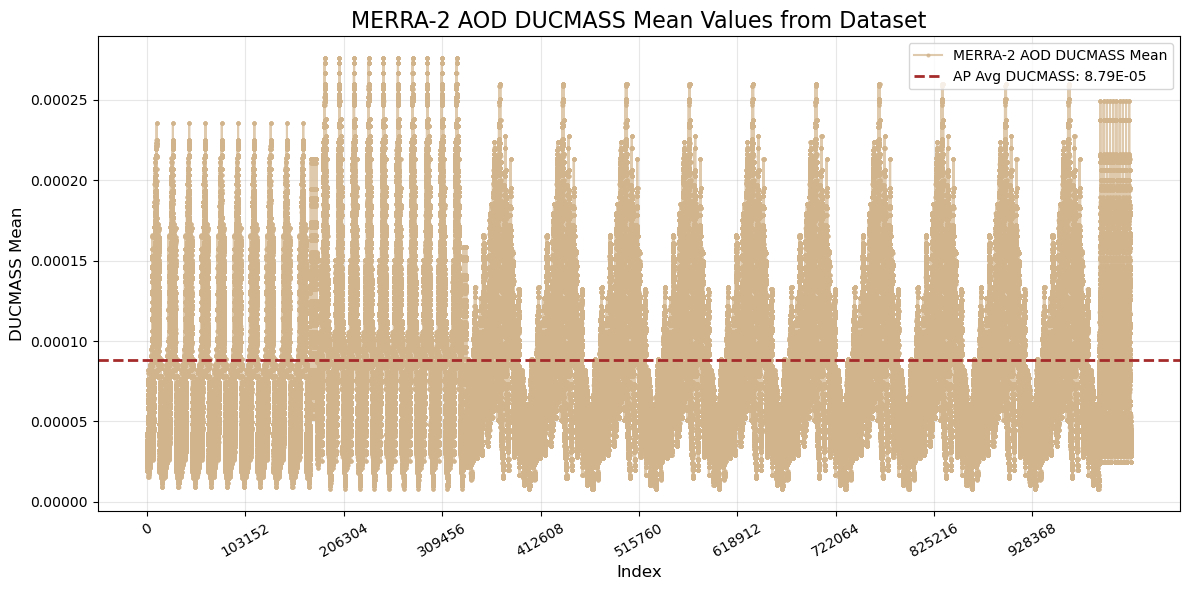

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the file path for the dataset
file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\ua_row_level_predictions_2023_v0063.csv"

# Define output directory for DUCMASS plots
output_dir = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\ducmass_plots"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

# Define the average DUCMASS concentration for the entire Arabian Peninsula
average_ducmass = 8.79E-05

try:
    # Load the dataset
    dataset = pd.read_csv(file_path)
    
    # Extract the 'DUCMASS_mean' column
    ducmass_mean = dataset['DUCMASS_mean']

    # Create the figure and plot
    plt.figure(figsize=(12, 6))
    # Plot using the index numbers on the x-axis
    plt.plot(ducmass_mean.index, ducmass_mean, linestyle='-', marker='o', markersize=2, color='tan', alpha=0.7, label='MERRA-2 AOD DUCMASS Mean')
    
    # Add a horizontal line for the average DUCMASS concentration
    plt.axhline(y=average_ducmass, color='brown', linestyle='--', linewidth=2, label=f'AP Avg DUCMASS: {average_ducmass:.2E}')
    
    # Set x-axis tick marks to the index numbers.
    # If the dataset is large, we display every nth tick for clarity.
    n = len(ducmass_mean)
    step = max(n // 10, 1)  # Display 10 ticks across the dataset (or every tick if there are fewer than 10)
    xticks = np.arange(0, n, step)
    plt.xticks(xticks, xticks, rotation=30, fontsize=10)
    
    # Formatting
    plt.title('MERRA-2 AOD DUCMASS Mean Values from Dataset', fontsize=16)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('DUCMASS Mean', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    # Save the plot
    save_path = os.path.join(output_dir, "ducmass_mean_plot_index.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Saved DUCMASS mean plot: {save_path}")
    
    # Show the plot
    plt.show()

except FileNotFoundError:
    print("The file was not found. Please ensure the file path is correct.")
except KeyError:
    print("'DUCMASS_mean' column not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


Graph of Model performances for AP

Saved model prediction plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_prediction_plots\ensemble_predictions_predictions.png


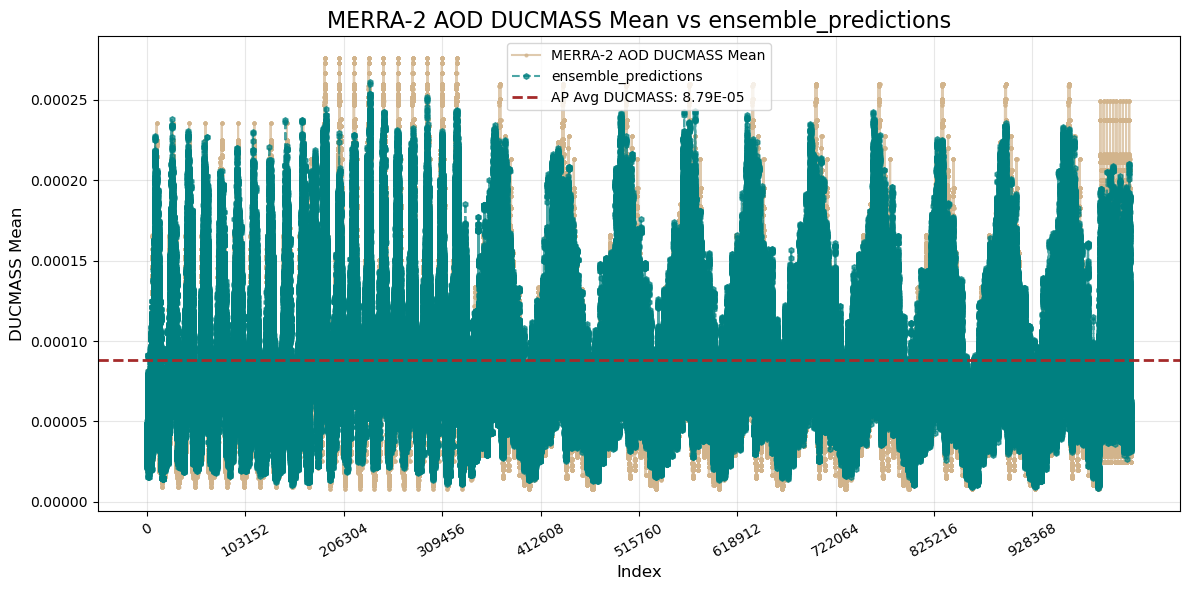

Saved model prediction plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_prediction_plots\lr_predictions_predictions.png


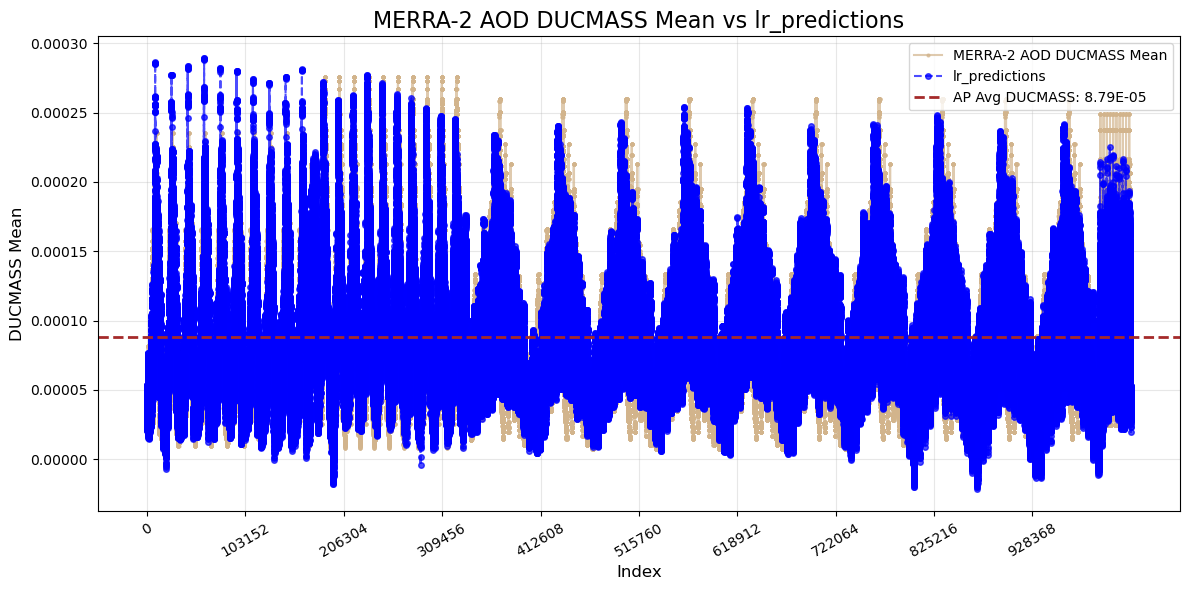

Saved model prediction plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_prediction_plots\knn_predictions_predictions.png


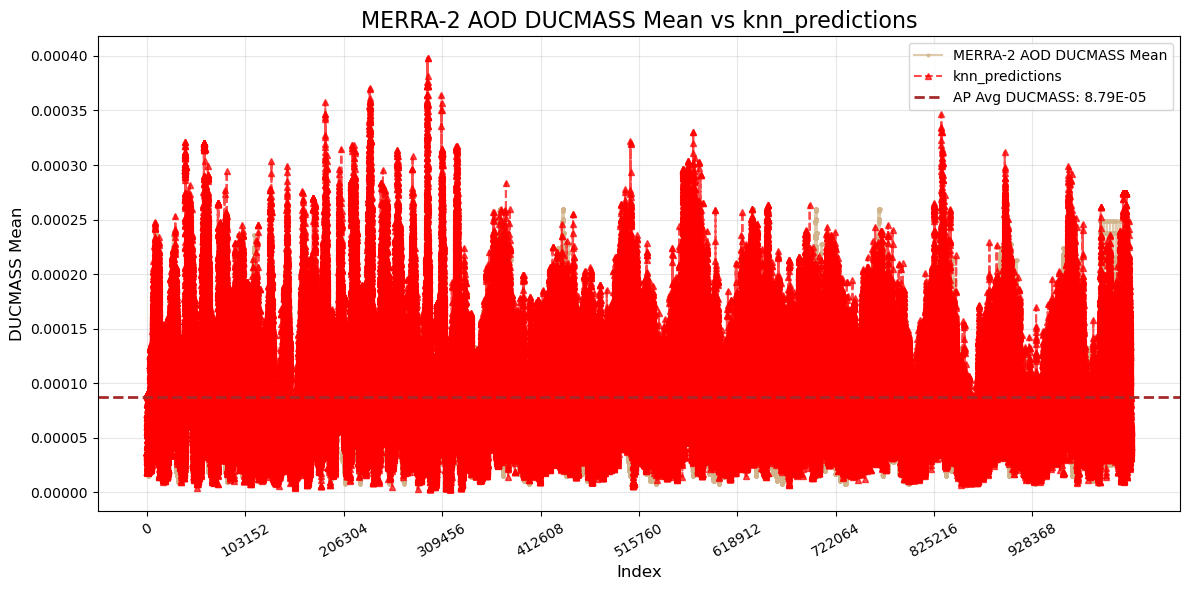

Saved model prediction plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_prediction_plots\dt_predictions_predictions.png


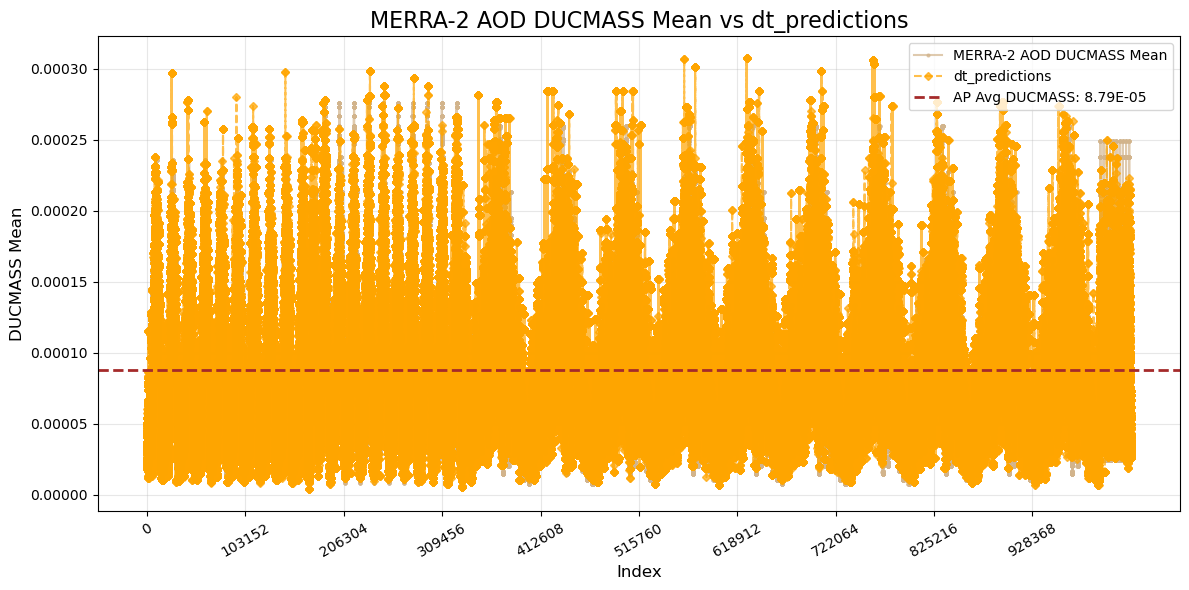

Saved model prediction plot: Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_prediction_plots\rf_predictions_predictions.png


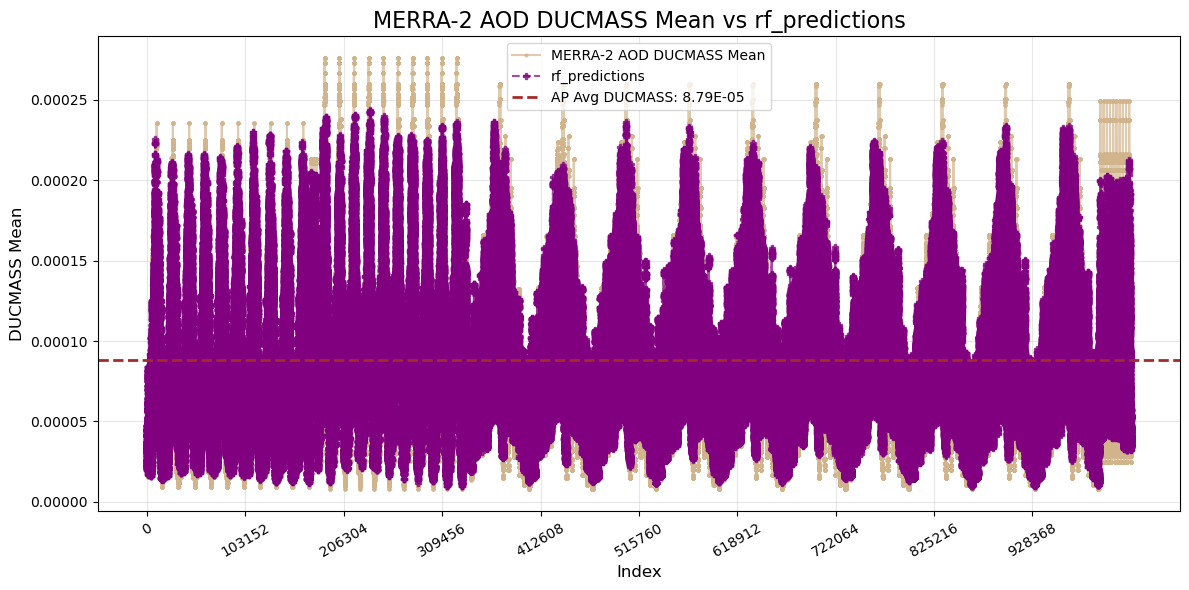

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the file path for the dataset
file_path = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\ua_row_level_predictions_2023_v0063.csv"

# Define output directory for model prediction plots
output_dir = r"Z:\Thesis\Data\test\DustCast\UA\DC_v0063\model_prediction_plots"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

# Define model styles
model_styles = {
    'ensemble_predictions': ('teal', 'h'),  # DustCast (DC)
    'lr_predictions': ('blue', 'o'),        # Linear Regression
    #'svr_predictions': ('green', 's'),        # Support Vector Regression
    'knn_predictions': ('red', '^'),          # K-Nearest Neighbors
    'dt_predictions': ('orange', 'D'),        # Decision Tree
    'rf_predictions': ('purple', 'P')         # Random Forest
}

# Define the AP average DUCMASS concentration
average_ducmass = 8.79E-05

# Load the dataset
try:
    dataset = pd.read_csv(file_path)

    # Extract the required columns
    ducmass_mean = dataset['DUCMASS_mean']
    models = model_styles.keys()

    # Loop through each model and create a separate plot
    for model in models:
        # Extract predictions for the current model
        predictions = dataset[model]
        color, marker = model_styles[model]
        
        # Create the plot
        plt.figure(figsize=(12, 6))
        plt.plot(ducmass_mean.index, ducmass_mean, linestyle='-', marker='o', markersize=2, 
                 color='tan', alpha=0.7, label='MERRA-2 AOD DUCMASS Mean')
        plt.plot(predictions.index, predictions, linestyle='--', marker=marker, markersize=4, 
                 color=color, alpha=0.7, label=f'{model}')
        
        # Add horizontal line for AP Avg DUCMASS
        plt.axhline(y=average_ducmass, color='brown', linestyle='--', linewidth=2, 
                    label=f'AP Avg DUCMASS: {average_ducmass:.2E}')

        # Set x-axis ticks using index numbers.
        n = len(ducmass_mean)
        step = max(n // 10, 1)  # Show about 10 ticks across the dataset
        xticks = np.arange(0, n, step)
        plt.xticks(xticks, xticks, rotation=30, fontsize=10)

        # Formatting
        plt.title(f'MERRA-2 AOD DUCMASS Mean vs {model}', fontsize=16)
        plt.xlabel('Index', fontsize=12)
        plt.ylabel('DUCMASS Mean', fontsize=12)
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()

        # Save the plot
        save_path = os.path.join(output_dir, f"{model}_predictions.png")
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved model prediction plot: {save_path}")

        # Show the plot
        plt.show()

except FileNotFoundError:
    print("The file was not found. Please ensure the file path is correct.")
except KeyError as e:
    print(f"Column not found in the dataset: {e}")
except Exception as e:
    print(f"An error occurred: {e}")
